In [1]:
%reset -f
# ============================================================================
##############################################################################
##############################################################################
# IMPORT ALL TIME PACKAGES
##############################################################################
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

import pickle, time, random, sys, warnings
# sys.path is a list of absolute path strings
sys.path.append('/home/d/dlr10/Documents/02_Statitics_modelling/0_FunctionsScripts')
import Loading_Data_Functions as load_fn
import FineTuning_Functions as FineTuning
import Learning_Curves_Functions as LearningCurves

matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['mathtext.fontset'] = 'cm'

warnings.filterwarnings('ignore')

2023-11-24 13:06:04.791625: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-24 13:06:04.791665: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
data = pickle.load( open('/home/d/dlr10/Documents/01_Preprocessing/00_Data_2016_2018/DataFrame_pickles/df_patients_admissions_2016_2018.pickle', 'rb'))
df_patients   = data[0]
df_admissions = data[1]
charlson_dict_16_18 = dict(zip(df_admissions['admission_id'], df_admissions['Comorbidity_score'].tolist()))


data = pickle.load( open('/home/d/dlr10/Documents/01_Preprocessing/00_Data_2019_2020/DataFrame_pickles/df_patients_admissions_2019_2020.pickle', 'rb'))
df_patients   = data[0]
df_admissions_ = data[1]
charlson_dict_19_20 = dict(zip(df_admissions_['admission_id'], df_admissions_['Comorbidity_score'].tolist()))

In [3]:
np.array(df_admissions['Comorbidity_score'].tolist()).max()

12

In [4]:
t_tot = time.time()
# ##############
# 1. LOAD DATA ---------------------------------------------------------------
# ============================================================================
t = time.time()
path = r'/home/d/dlr10/Documents/02_Statitics_modelling/DataSets/'
#df_patients_16_18, df_admissions_16_18, _ = load_fn.Load_data()
#df_patients_19_20, df_admissions_19_20, _ = load_fn.Load_data('2019_2020')

d_16_18_mrt = pickle.load(open(path + 'df_ts_2016_18.pickle','rb'))
d_19_20_mrt = pickle.load(open(path + 'df_ts_2019_20.pickle','rb'))

d_16_18_ews = pickle.load(open(path + 'df_ts_2016_18_ews_1d.pickle','rb'))
d_19_20_ews = pickle.load(open(path + 'df_ts_2019_20_ews_1d.pickle','rb'))

d_16_18_los = pickle.load(open(path + 'df_ts_2016_18_los_1d.pickle','rb'))
d_19_20_los = pickle.load(open(path + 'df_ts_2019_20_los_1d.pickle','rb'))

In [5]:
len(d_16_18_mrt['admission_id'].unique())

9390

In [6]:
d_16_18_ews[0].dtypes

admission_id          object
rr                   float64
ews                  float64
heart_rate           float64
temperature          float64
sbp                  float64
dbp                  float64
Oxygen_Saturation    float64
Assisted_O2          float64
Confusion            float64
CREA                 float64
UREA                 float64
K                    float64
GFR                  float64
WBC                  float64
PLT                  float64
HCT                  float64
HGB                  float64
RBC                  float64
MCH                  float64
MCV                  float64
NEUAB                float64
TLYMAB               float64
EOSAB                float64
MONAB                float64
BASAB                float64
ALB                  float64
ALP                  float64
BILI                 float64
no_sample_series     float64
sex                  float64
ethnicity            float64
age_at_admin         float64
Comorb_score         float64
Spcfc_Comorb  

# Mortalidad

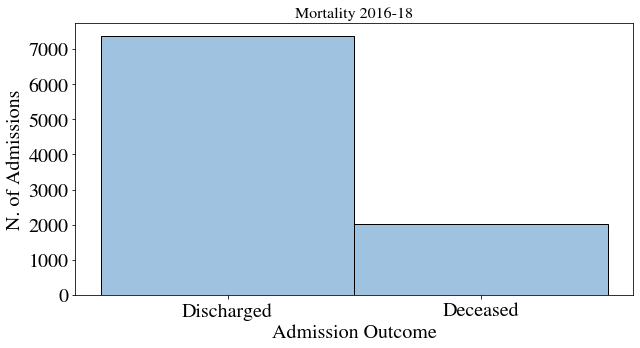

In [7]:
name    = 'Mort_target_16_18' 
mortality = d_16_18_mrt.groupby(by = ['admission_id']).mean()['Mortality']
fig, ax = plt.subplots(figsize = (10,5))
mortality.hist(ax = ax, align='left', bins = range(3), grid = False, edgecolor='black', color='#9fc2e0')
ax.set_xlabel('Admission Outcome', fontsize = 20)
ax.set_ylabel('N. of Admissions', fontsize = 20)
plt.xticks(range(2), ['Discharged', 'Deceased'], fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Mortality 2016-18', fontsize = 16)
plt.savefig(name + '.png', transparent = True, bbox_inches = "tight")
plt.show()

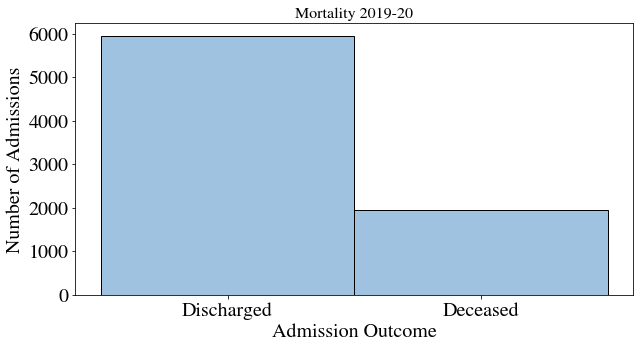

In [8]:
name    = 'Mort_target_19_20' 
mortality = d_19_20_mrt.groupby(by = ['admission_id']).mean()['Mortality']
fig, ax = plt.subplots(figsize = (10,5))
mortality.hist(ax = ax, align='left', bins = range(3), grid = False, edgecolor='black', color='#9fc2e0')
ax.set_xlabel('Admission Outcome', fontsize = 20)
ax.set_ylabel('Number of Admissions', fontsize = 20)
plt.xticks(range(2), ['Discharged', 'Deceased'], fontsize = 20)
plt.yticks( fontsize = 20)
plt.title('Mortality 2019-20', fontsize = 16)
plt.savefig(name + '.png', transparent = True, bbox_inches = "tight")
plt.show()

# CURB65

In [9]:
t = time.time()
path = r'/home/d/dlr10/Documents/02_Statitics_modelling/DataSets/'


d_16_18_crb = pickle.load(open(path + 'df_ts_curb_2016_18_1d.pickle','rb'))#drop(columns = 'no_sample_series')
d_19_20_crb = pickle.load(open(path + 'df_ts_curb_2019_20_1d.pickle','rb'))#drop(columns = 'no_sample_series')


In [10]:
d_lst = d_16_18_crb.copy()
t_crb_o65 = [len(d_lst[i][d_lst[i]['age_at_admin'] > 65]['admission_id'].unique()) for i in range(len(d_lst))]
t_crb_u65 = [len(d_lst[i][d_lst[i]['age_at_admin'] <= 65]['admission_id'].unique()) for i in range(len(d_lst))]

d_lst = d_19_20_crb.copy()
v_crb_o65 = [len(d_lst[i][d_lst[i]['age_at_admin'] > 65]['admission_id'].unique()) for i in range(len(d_lst))]
v_crb_u65 = [len(d_lst[i][d_lst[i]['age_at_admin'] <= 65]['admission_id'].unique()) for i in range(len(d_lst))]
display(t_crb_o65)
display(t_crb_u65)
display(v_crb_o65)
display(v_crb_u65)

[0, 5441, 1753]

[1164, 998, 34]

[803, 4039, 517]

[369, 1898, 266]

In [11]:
803+4039+517

5359

In [12]:
369+1898+266

2533

In [13]:
5359 +2533

7892

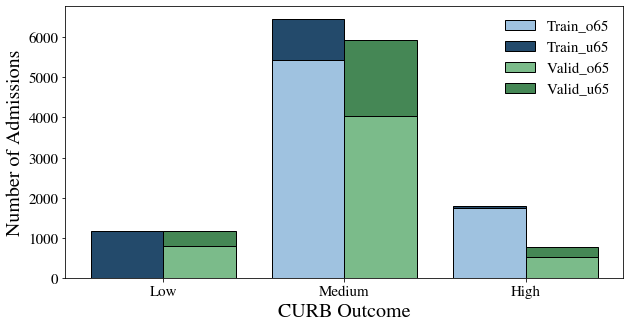

In [14]:
colors = ['#9fc2e0', '#234A6B', '#7BBB8A', '#458755']
pos    = [0.2, -0.2]

fig, ax = plt.subplots( figsize = (10,5))

ax.bar(np.array(range(len(t_crb_o65))) + pos[1], t_crb_o65, edgecolor='black', label = 'Train_o65', 
       color=colors[0], width = 0.4)
ax.bar(np.array(range(len(t_crb_u65))) + pos[1], t_crb_u65, edgecolor='black', label = 'Train_u65', bottom = t_crb_o65,
       color=colors[1], width = 0.4)
ax.bar(np.array(range(len(v_crb_o65))) + pos[0], v_crb_o65, edgecolor='black', label = 'Valid_o65',
       color=colors[2], width = 0.4)
ax.bar(np.array(range(len(v_crb_u65))) + pos[0], v_crb_u65, edgecolor='black', label = 'Valid_u65', bottom = v_crb_o65,
       color=colors[3], width = 0.4)

curbs_vals = range(3)

ax.set_xlabel('CURB Outcome', fontsize = 20)
ax.set_ylabel('Number of Admissions', fontsize = 20)
plt.xticks(curbs_vals, ['Low','Medium','High'], fontsize = 15)
plt.yticks(fontsize = 15)
#plt.title('EWS 2016-18', fontsize = 16)
plt.legend(fontsize = 15, frameon=False, loc = 'best')
plt.savefig('Distribution_CURB_Age.png', transparent = True, bbox_inches = "tight")
#ax.grid(axis='')
plt.show()

# Early Warning Score EWS

In [15]:
colors = ['#9fc2e0', '#FA8072']
labels = ['Discharged', 'Deceased']
pos = [0.2, -0.2]

#234A6B #B61706

0     1     2    3    4    5    6   7   8   9   ...  11  12  \
Mortality 0  2611  1449  1713  862  342  159  108  56  33  17  ...   6   2   
Mortality 1   571   317   470  283  126   89   57  42  33  11  ...   7   4   

             13  14  15  16  17  18  19  20  
Mortality 0   0   1   0   0   0   0   0   0  
Mortality 1   1   0   1   1   0   0   0   0  

[2 rows x 21 columns]

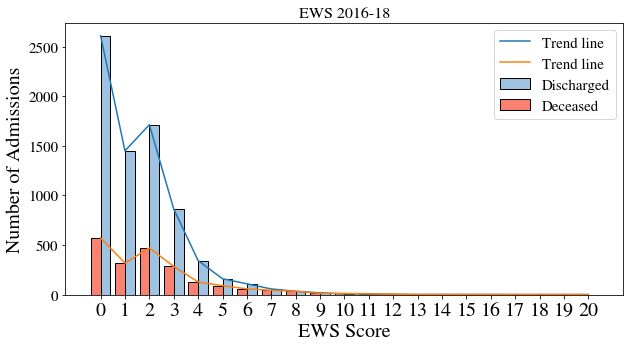

In [16]:
name    = 'EWS_target_16_18' 
df_data = d_16_18_ews.copy()

df_ = df_data[0][['admission_id', 'Mortality']].groupby(by=['admission_id']).mean()
dict_ews = dict(zip(df_data[0]['admission_id'].unique().tolist(),df_data[1]))
df_['ews'] = [dict_ews[x] for x in df_.index]

mt = 0
df = pd.DataFrame(columns = range(21))
fig, ax = plt.subplots(figsize = (10,5))
for mt in df_['Mortality'].unique():
    mt = int(mt)
    ews = np.array(df_[df_['Mortality'] == mt]['ews'])
    ews_vals = range(21)
    ews_ = [(i, sum(ews == i)) for i in ews_vals]
    
    x = np.array(list(list(zip(*ews_))[0]))
    y = np.array(list(list(zip(*ews_))[1]))
    df.loc['Mortality ' + str(mt)]= list(y)
    ax.bar(x + pos[mt], y,edgecolor='black', color=colors[mt], label=labels[mt], width = 0.4)
    ax.plot(x , y, label = 'Trend line')#,edgecolor='black', color=colors[mt], label=labels[mt], width = 0.4)
ax.set_xlabel('EWS Score', fontsize = 20)
ax.set_ylabel('Number of Admissions', fontsize = 20)
plt.xticks(x, x, fontsize = 20)
plt.yticks(fontsize = 15)
plt.title('EWS 2016-18', fontsize = 16)
plt.legend(fontsize = 15)
display(df)
plt.savefig(name + '.png', transparent = True, bbox_inches = "tight")
plt.show()

0     1     2     3    4    5    6   7   8   9   ...  11  12  \
Mortality 0  1431  1010  1308  1051  622  231  145  75  36  16  ...   7   1   
Mortality 1   384   277   358   347  236  141   83  40  34  22  ...   5   3   

             13  14  15  16  17  18  19  20  
Mortality 0   1   0   0   0   0   0   0   0  
Mortality 1   3   0   1   0   0   0   0   0  

[2 rows x 21 columns]

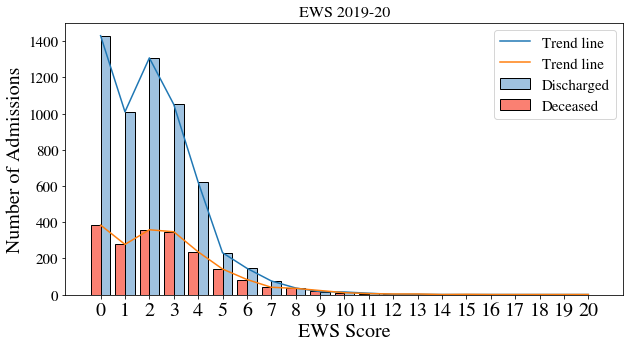

In [17]:
name    = 'EWS_target_19_20' 
df_data = d_19_20_ews.copy()

df_ = df_data[0][['admission_id', 'Mortality']].groupby(by=['admission_id']).mean()
dict_ews = dict(zip(df_data[0]['admission_id'].unique().tolist(),df_data[1]))
df_['ews'] = [dict_ews[x] for x in df_.index]

mt = 0
df = pd.DataFrame(columns = range(21))
fig, ax = plt.subplots(figsize = (10,5))
for mt in df_['Mortality'].unique():
    mt = int(mt)
    ews = np.array(df_[df_['Mortality'] == mt]['ews'])
    ews_vals = range(21)
    ews_ = [(i, sum(ews == i)) for i in ews_vals]
    
    x = np.array(list(list(zip(*ews_))[0]))
    y = np.array(list(list(zip(*ews_))[1]))
    df.loc['Mortality ' + str(mt)]= list(y)
    ax.bar(x + pos[mt], y,edgecolor='black', color=colors[mt], label=labels[mt], width = 0.4)
    ax.plot(x , y, label = 'Trend line')#,edgecolor='black', color=colors[mt], label=labels[mt], width = 0.4)
ax.set_xlabel('EWS Score', fontsize = 20)
ax.set_ylabel('Number of Admissions', fontsize = 20)
plt.xticks(x, x, fontsize = 20)
plt.yticks(fontsize = 15)
plt.title('EWS 2019-20', fontsize = 16)
plt.legend(fontsize = 15)
display(df)
plt.savefig(name + '.png', transparent = True, bbox_inches = "tight")
plt.show()

0     1     2     3    4    5    6   7   8   9   ...  11 12 13 14 15  \
EWS  3182  1766  2183  1145  468  248  165  98  66  28  ...  13  6  1  1  1   

    16 17 18 19 20  
EWS  1  0  0  0  0  

[1 rows x 21 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0     1     2     3    4    5    6   7   8   9   ...  11 12 13 14 15  \
EWS  3182  1766  2183  1145  468  248  165  98  66  28  ...  13  6  1  1  1   

    16 17 18 19 20  
EWS  1  0  0  0  0  

[1 rows x 21 columns]

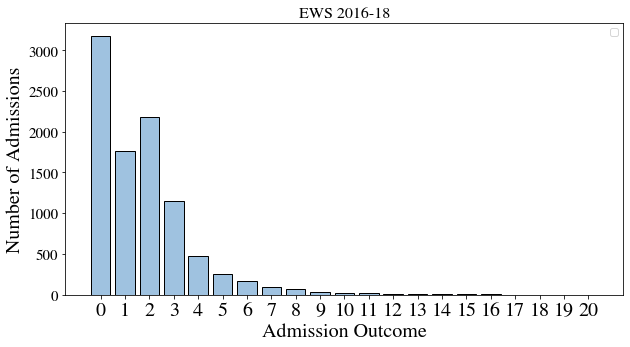

In [18]:
ews = np.array(d_16_18_ews[1])
ews_vals = range(21)
ews_ = [(i, sum(ews == i)) for i in ews_vals]
df = pd.DataFrame([list(list(zip(*ews_))[1])], columns = [list(list(zip(*ews_))[0])], index = ['EWS'])
display(df)
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(list(list(zip(*ews_))[0]), list(list(zip(*ews_))[1]), edgecolor='black', color='#9fc2e0')
ax.set_xlabel('Admission Outcome')
ax.set_ylabel('Number of Admissions')
ax.set_xlabel('Admission Outcome', fontsize = 20)
ax.set_ylabel('Number of Admissions', fontsize = 20)
plt.xticks(list(list(zip(*ews_))[0]), list(list(zip(*ews_))[0]), fontsize = 20)
plt.yticks(fontsize = 15)
plt.title('EWS 2016-18', fontsize = 16)
plt.legend()
display(df)
plt.savefig(name + '.png', transparent = True, bbox_inches = "tight")
plt.show()

0     1     2     3    4    5    6    7   8   9   ...  11 12 13 14 15  \
EWS  1815  1287  1666  1398  858  372  228  115  70  38  ...  12  4  4  0  1   

    16 17 18 19 20  
EWS  0  0  0  0  0  

[1 rows x 21 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0     1     2     3    4    5    6    7   8   9   ...  11 12 13 14 15  \
EWS  1815  1287  1666  1398  858  372  228  115  70  38  ...  12  4  4  0  1   

    16 17 18 19 20  
EWS  0  0  0  0  0  

[1 rows x 21 columns]

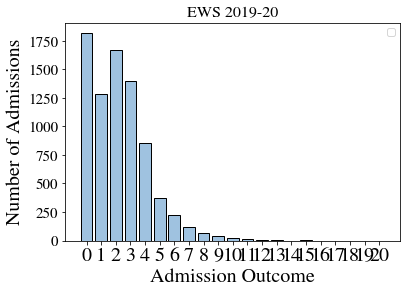

In [19]:
ews = np.array(d_19_20_ews[1])
ews_vals = range(21)
ews_ = [(i, sum(ews == i)) for i in ews_vals]
df = pd.DataFrame([list(list(zip(*ews_))[1])], columns = [list(list(zip(*ews_))[0])], index = ['EWS'])
display(df)
fig, ax = plt.subplots()
ax.bar(list(list(zip(*ews_))[0]), list(list(zip(*ews_))[1]), edgecolor='black', color='#9fc2e0')
ax.set_xlabel('Admission Outcome')
ax.set_ylabel('Number of Admissions')
ax.set_xlabel('Admission Outcome', fontsize = 20)
ax.set_ylabel('Number of Admissions', fontsize = 20)
plt.xticks(list(list(zip(*ews_))[0]), list(list(zip(*ews_))[0]), fontsize = 20)
plt.yticks(fontsize = 15)
plt.title('EWS 2019-20', fontsize = 16)
plt.legend()
display(df)
plt.savefig(name + '.png', transparent = True, bbox_inches = "tight")
plt.show()

## Aggregate EWS

In [20]:
EWS_bands = lambda x: 0 if x == 0 else 1 if x == 1 else 2 if x == 2 else 3 if x == 3 else 4

In [23]:
len(d_16_18_ews[1])

9390

0     1     2    3    4
Mortality 0  2611  1449  1713  862  731
Mortality 1   571   317   470  283  383

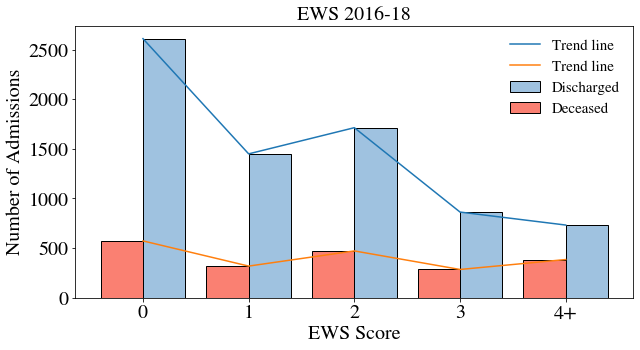

In [24]:
name    = 'EWS_target_16_18_aggregate' 
df_data = d_16_18_ews.copy()

df_ = df_data[0][['admission_id', 'Mortality']].groupby(by=['admission_id']).mean()
ews_new = [EWS_bands(x) for x in df_data[1]]
dict_ews = dict(zip(df_data[0]['admission_id'].unique().tolist(),ews_new))
df_['ews'] = [dict_ews[x] for x in df_.index]

mt = 0
df = pd.DataFrame(columns = range(5))
fig, ax = plt.subplots(figsize = (10,5))
for mt in df_['Mortality'].unique():
    mt = int(mt)
    ews = np.array(df_[df_['Mortality'] == mt]['ews'])
    ews_vals = range(5)
    ews_ = [(i, sum(ews == i)) for i in ews_vals]
    
    x = np.array(list(list(zip(*ews_))[0]))
    y = np.array(list(list(zip(*ews_))[1]))
    df.loc['Mortality ' + str(mt)]= list(y)
    ax.bar(x + pos[mt], y,edgecolor='black', color=colors[mt], label=labels[mt], width = 0.4)
    ax.plot(x , y, label = 'Trend line')#,edgecolor='black', color=colors[mt], label=labels[mt], width = 0.4)
ax.set_xlabel('EWS Score', fontsize = 20)
ax.set_ylabel('Number of Admissions', fontsize = 20)
plt.xticks(x,['0','1','2','3','4+'], fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('EWS 2016-18', fontsize = 20)
plt.legend(fontsize = 15, frameon=False)
display(df)
plt.savefig(name + '.png', transparent = True, bbox_inches = "tight")
plt.show()

In [25]:
len(d_19_20_ews[1])

7892

0     1     2     3     4
Mortality 0  1431  1010  1308  1051  1148
Mortality 1   384   277   358   347   578

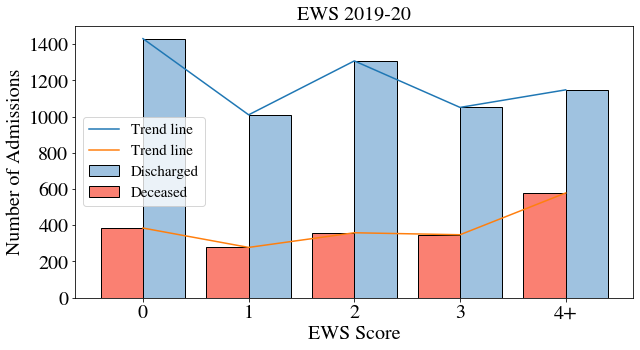

In [26]:
name    = 'EWS_target_19_20_aggregate' 
df_data = d_19_20_ews.copy()

df_ = df_data[0][['admission_id', 'Mortality']].groupby(by=['admission_id']).mean()
ews_new = [EWS_bands(x) for x in df_data[1]]
dict_ews = dict(zip(df_data[0]['admission_id'].unique().tolist(),ews_new))
df_['ews'] = [dict_ews[x] for x in df_.index]

mt = 0
df = pd.DataFrame(columns = range(5))
fig, ax = plt.subplots(figsize = (10,5))
for mt in df_['Mortality'].unique():
    mt = int(mt)
    ews = np.array(df_[df_['Mortality'] == mt]['ews'])
    ews_vals = range(5)
    ews_ = [(i, sum(ews == i)) for i in ews_vals]
    
    x = np.array(list(list(zip(*ews_))[0]))
    y = np.array(list(list(zip(*ews_))[1]))
    df.loc['Mortality ' + str(mt)]= list(y)
    ax.bar(x + pos[mt], y,edgecolor='black', color=colors[mt], label=labels[mt], width = 0.4)
    ax.plot(x , y, label = 'Trend line')#,edgecolor='black', color=colors[mt], label=labels[mt], width = 0.4)
ax.set_xlabel('EWS Score', fontsize = 20)
ax.set_ylabel('Number of Admissions', fontsize = 20)
plt.xticks(x,['0','1','2','3','4+'], fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('EWS 2019-20', fontsize = 20)
plt.legend(fontsize = 15, frameon=True, loc = 'best')
display(df)
plt.savefig(name + '.png', transparent = True, bbox_inches = "tight")
plt.show()

In [27]:
def df_plot_creation(df_r, ews):
    t = time.time()
    admins = df_r['admission_id'].unique().tolist()
    ages   = [df_r[df_r['admission_id'] == adm]['age_at_admin'].mean() for adm in admins]
    ews_df = list(zip(admins, ages, ews))
    ews_df = pd.DataFrame(ews_df, columns = ['admn', 'age','ews'])
    print(time.time() - t)
    return ews_df

# ====================
df_r = d_16_18_ews[0].copy()
ews  = d_16_18_ews[1].copy()
df_plot_16_18_ews = df_plot_creation(df_r, ews)
print('length of df', len(df_plot_16_18_ews))

# ====================
df_r = d_19_20_ews[0].copy()
ews  = d_19_20_ews[1].copy()
df_plot_19_20_ews = df_plot_creation(df_r, ews)
print('length of df', len(df_plot_19_20_ews))


728.6553926467896
length of df 9390
528.924751996994
length of df 7892


In [28]:
df_tot_ews = df_plot_16_18_ews.copy()

df = df_tot_ews[(df_tot_ews['age'] >= 65)]
print(len(df))
ews = np.array([EWS_bands(x) for x in df['ews']])
ews_1 = [(i, sum(ews == i)) for i in range(len(np.unique(ews)))]
t_ews_o65 = [(sum(ews == i)) for i in range(len(np.unique(ews)))]
print(t_ews_o65)

df = df_tot_ews[(df_tot_ews['age'] < 65)]
print(len(df))
ews = np.array([EWS_bands(x) for x in df['ews']])
ews_2 = [(i, sum(ews == i)) for i in range(len(np.unique(ews)))]
t_ews_u65 = [(sum(ews == i)) for i in range(len(np.unique(ews)))]
print(t_ews_u65)

#np.concatenate((ews_o65, ews_u65), axis=0)

7330
[2699, 1316, 1703, 818, 794]
2060
[483, 450, 480, 327, 320]


In [29]:
df_tot_ews = df_plot_19_20_ews.copy()

df = df_tot_ews[(df_tot_ews['age'] >= 65)]
print(len(df))
ews = np.array([EWS_bands(x) for x in df['ews']])
ews_1 = [(i, sum(ews == i)) for i in range(len(np.unique(ews)))]
v_ews_o65 = [(sum(ews == i)) for i in range(len(np.unique(ews)))]
print(v_ews_o65)

df = df_tot_ews[(df_tot_ews['age'] < 65)]
print(len(df))
ews = np.array([EWS_bands(x) for x in df['ews']])
ews_2 = [(i, sum(ews == i)) for i in range(len(np.unique(ews)))]
v_ews_u65 = [(sum(ews == i)) for i in range(len(np.unique(ews)))]
print(v_ews_u65)

#np.concatenate((ews_o65, ews_u65), axis=0)

5465
[1489, 935, 1174, 879, 988]
2427
[326, 352, 492, 519, 738]


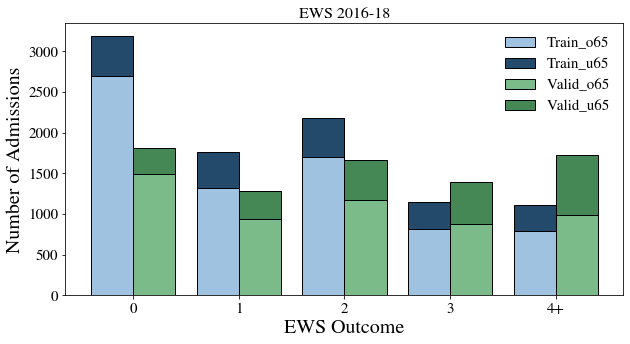

In [30]:
colors = ['#9fc2e0', '#234A6B', '#7BBB8A', '#458755']
pos = [0.2, -0.2]

fig, ax = plt.subplots( figsize = (10,5))

ax.bar(np.array(range(len(t_ews_o65))) + pos[1], t_ews_o65, edgecolor='black', label = 'Train_o65', 
       color=colors[0], width = 0.4)
ax.bar(np.array(range(len(t_ews_u65))) + pos[1], t_ews_u65, edgecolor='black', label = 'Train_u65', bottom = t_ews_o65,
       color=colors[1], width = 0.4)
ax.bar(np.array(range(len(v_ews_o65))) + pos[0], v_ews_o65, edgecolor='black', label = 'Valid_o65',
       color=colors[2], width = 0.4)
ax.bar(np.array(range(len(v_ews_u65))) + pos[0], v_ews_u65, edgecolor='black', label = 'Valid_u65', bottom = v_ews_o65,
       color=colors[3], width = 0.4)


ax.set_xlabel('EWS Outcome', fontsize = 20)
ax.set_ylabel('Number of Admissions', fontsize = 20)
plt.xticks(ews_vals, ['0','1','2','3','4+'], fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('EWS 2016-18', fontsize = 16)
plt.legend(fontsize = 15, frameon=False, loc = 'best')
plt.savefig('Distribution_EWS_Age.png', transparent = True, bbox_inches = "tight")
#ax.grid(axis='')
plt.show()

In [31]:
np.array(range(5))

array([0, 1, 2, 3, 4])

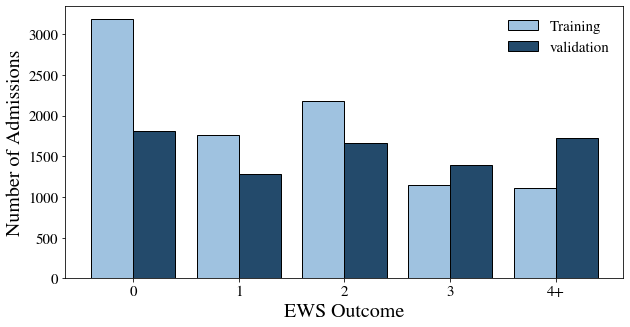

In [32]:



ews = np.array(d_16_18_ews[1])
ews = np.array([EWS_bands(x) for x in ews])
ews_vals = range(5)
ews_ = [(i, sum(ews == i)) for i in ews_vals]
#df = pd.DataFrame([list(list(zip(*ews_))[1])], columns = [list(list(zip(*ews_))[0])], index = ['EWS'])
#display(df)

ews = np.array(d_19_20_ews[1])
ews = np.array([EWS_bands(x) for x in ews])
ews_vals = range(5)
ews_2 = [(i, sum(ews == i)) for i in ews_vals]
#df = pd.DataFrame([list(list(zip(*ews_2))[1])], columns = [list(list(zip(*ews_))[0])], index = ['EWS'])
#display(df)

fig, ax = plt.subplots( figsize = (10,5))
uz_16_18 = list(zip(*ews_))
uz_19_20 = list(zip(*ews_2))
ax.bar(np.array(list(uz_16_18[0])) + pos[1], list(uz_16_18)[1], edgecolor='black', label = 'Training', 
       color=colors[0], width = 0.4)
ax.bar(np.array(list(uz_19_20[0])) + pos[0], list(uz_19_20)[1], edgecolor='black', label = 'validation',
       color=colors[1], width = 0.4)
ax.set_xlabel('EWS Outcome', fontsize = 20)
ax.set_ylabel('Number of Admissions', fontsize = 20)
plt.xticks(ews_vals, ['0','1','2','3','4+'], fontsize = 15)
plt.yticks(fontsize = 15)
#plt.title('EWS 2016-18', fontsize = 16)
plt.legend(fontsize = 15, frameon=False, loc = 'best')
#ax.grid(axis='')
plt.show()


In [33]:
np.array(list(list(zip(*ews_))[0]) ) + pos[0]

array([0.2, 1.2, 2.2, 3.2, 4.2])

In [34]:
list(list(zip(*ews_))[0])

[0, 1, 2, 3, 4]

# Lenght of Stay LoS

In [35]:
def df_plot_creation(df_r, ews):
    t = time.time()
    admins = df_r['admission_id'].unique().tolist()
    ages   = [df_r[df_r['admission_id'] == adm]['age_at_admin'].mean() for adm in admins]
    dict_classes = {'3-4d':0, '5-6d':1, '7d':2, '8-9d':3,'10-13d':4, '2w':5, '3w':6, '4w':7}
    los = [dict_classes[x] for a,x in  ews]
    ews_df = list(zip(admins, ages, los))
    ews_df = pd.DataFrame(ews_df, columns = ['admn', 'age','ews'])
    print(time.time() - t)
    return ews_df

# ====================
df_r = d_16_18_los[0].copy()
ews  = d_16_18_los[1].copy()
df_plot_16_18_los = df_plot_creation(df_r, ews)
print('length of df', len(df_plot_16_18_ews))

# ====================
df_r = d_19_20_los[0].copy()
ews  = d_19_20_los[1].copy()
df_plot_19_20_los = df_plot_creation(df_r, ews)
print('length of df', len(df_plot_19_20_ews))

723.0255272388458
length of df 9390
514.4989151954651
length of df 7892


In [36]:
df_tot_ews = df_plot_16_18_los.copy()

df = df_tot_ews[(df_tot_ews['age'] >= 65)]
print(len(df))
ews = np.array(df['ews'])
ews_1 = [(i, sum(ews == i)) for i in range(len(np.unique(ews)))]
t_los_o65 = [(sum(ews == i)) for i in range(len(np.unique(ews)))]
print(t_los_o65)

df = df_tot_ews[(df_tot_ews['age'] < 65)]
print(len(df))
ews = np.array(df['ews'])
ews_2 = [(i, sum(ews == i)) for i in range(len(np.unique(ews)))]
t_los_u65 = [(sum(ews == i)) for i in range(len(np.unique(ews)))]
print(t_los_u65)

#np.concatenate((ews_o65, ews_u65), axis=0)

7330
[604, 1133, 510, 897, 1294, 233, 1054, 1605]
2060
[266, 336, 158, 267, 290, 44, 251, 448]


In [37]:
df_tot_ews = df_plot_19_20_los.copy()

df = df_tot_ews[(df_tot_ews['age'] >= 65)]
print(len(df))
ews = np.array(df['ews'])
ews_1 = [(i, sum(ews == i)) for i in range(len(np.unique(ews)))]
v_los_o65 = [(sum(ews == i)) for i in range(len(np.unique(ews)))]
print(v_los_o65)

df = df_tot_ews[(df_tot_ews['age'] < 65)]
print(len(df))
ews = np.array(df['ews'])
ews_2 = [(i, sum(ews == i)) for i in range(len(np.unique(ews)))]
v_los_u65 = [(sum(ews == i)) for i in range(len(np.unique(ews)))]
print(v_los_u65)

#np.concatenate((ews_o65, ews_u65), axis=0)

5465
[422, 720, 392, 701, 1033, 194, 843, 1160]
2427
[285, 432, 206, 342, 396, 55, 240, 471]


In [35]:
dict_LoS = {'3-4d':0, '5-6d':1, '7d':2, '8-9d':3,'10-13d':4, '2w':5, '3w':6, '4w':7}

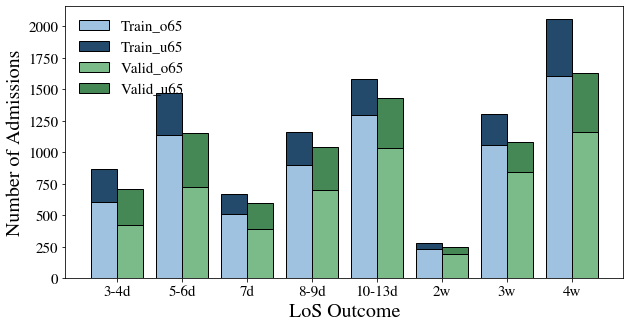

In [36]:
colors = ['#9fc2e0', '#234A6B', '#7BBB8A', '#458755']
pos = [0.2, -0.2]

fig, ax = plt.subplots( figsize = (10,5))

ax.bar(np.array(range(len(t_los_o65))) + pos[1], t_los_o65, edgecolor='black', label = 'Train_o65', 
       color=colors[0], width = 0.4)
ax.bar(np.array(range(len(t_los_u65))) + pos[1], t_los_u65, edgecolor='black', label = 'Train_u65', bottom = t_los_o65,
       color=colors[1], width = 0.4)
ax.bar(np.array(range(len(v_los_o65))) + pos[0], v_los_o65, edgecolor='black', label = 'Valid_o65',
       color=colors[2], width = 0.4)
ax.bar(np.array(range(len(v_los_u65))) + pos[0], v_los_u65, edgecolor='black', label = 'Valid_u65', bottom = v_los_o65,
       color=colors[3], width = 0.4)


ax.set_xlabel('LoS Outcome', fontsize = 20)
ax.set_ylabel('Number of Admissions', fontsize = 20)
plt.xticks(range(len(dict_LoS.keys())), list(dict_LoS.keys()), fontsize = 15)
plt.yticks(fontsize = 15)
#plt.title('Target variable: LoS 2016-18', fontsize = 16)
plt.legend(fontsize = 15, frameon=False, loc = 'best')
plt.savefig('Distribution_LOS_Age.png', transparent = True, bbox_inches = "tight")
#ax.grid(axis='')
plt.show()

3-4d  5-6d   7d  8-9d  10-13d   2w   3w    4w
Mortality 0   718  1248  563   966    1241  203  956  1471
Mortality 1   152   221  105   198     343   74  349   582

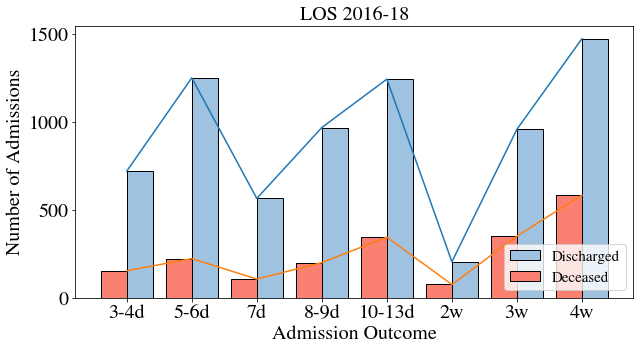

In [37]:
colors = ['#9fc2e0', '#FA8072']
name    = 'LoS_target_16_18_aggregate' 
df_data = d_16_18_los.copy()

df_ = df_data[0][['admission_id', 'Mortality']].groupby(by=['admission_id']).mean()
dict_los = dict(df_data[1])
df_['los'] = [dict_los[x] for x in df_.index]

mt = 0
df = pd.DataFrame(columns = dict_LoS.keys())
fig, ax = plt.subplots(figsize = (10,5))

for mt in df_['Mortality'].unique():
    mt = int(mt)
    los = np.array(df_[df_['Mortality'] == mt]['los'])
    los_vals = dict_LoS.keys()
    los_ = [(i, sum(los == i)) for i in los_vals]
    
    x = np.array(range(len(list(list(zip(*los_))[0]))))
    y = np.array(list(list(zip(*los_))[1]))
    df.loc['Mortality ' + str(mt)]= list(y)
    ax.bar(x + pos[mt], y,edgecolor='black', color=colors[mt], label=labels[mt], width = 0.4)
    ax.plot(x , y)#,edgecolor='black', color=colors[mt], label=labels[mt], width = 0.4)
ax.set_xlabel('Admission Outcome', fontsize = 20)
ax.set_ylabel('Number of Admissions', fontsize = 20)
plt.xticks(x,list(dict_LoS.keys()))
plt.title('LOS 2016-18', fontsize = 20)
plt.tick_params(axis='both', labelsize=20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15, loc = 'lower right')#, frameon=False, loc = 'best')
display(df)
plt.savefig(name + '.png', transparent = True, bbox_inches = "tight")
plt.show()

3-4d  5-6d   7d  8-9d  10-13d   2w   3w    4w
Mortality 0   557   958  481   827    1090  181  756  1098
Mortality 1   150   194  117   216     339   68  327   533

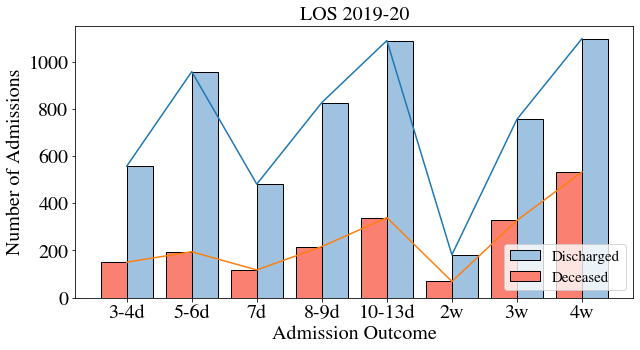

In [38]:
name    = 'LoS_target_19_20_aggregate' 
df_data = d_19_20_los.copy()

df_ = df_data[0][['admission_id', 'Mortality']].groupby(by=['admission_id']).mean()
dict_los = dict(df_data[1])
df_['los'] = [dict_los[x] for x in df_.index]

mt = 0
df = pd.DataFrame(columns = dict_LoS.keys())
fig, ax = plt.subplots(figsize = (10,5))

for mt in df_['Mortality'].unique():
    mt = int(mt)
    los = np.array(df_[df_['Mortality'] == mt]['los'])
    los_vals = dict_LoS.keys()
    los_ = [(i, sum(los == i)) for i in los_vals]
    
    x = np.array(range(len(list(list(zip(*los_))[0]))))
    y = np.array(list(list(zip(*los_))[1]))
    df.loc['Mortality ' + str(mt)]= list(y)
    ax.bar(x + pos[mt], y,edgecolor='black', color=colors[mt], label=labels[mt], width = 0.4)
    ax.plot(x , y)#,edgecolor='black', color=colors[mt], label=labels[mt], width = 0.4)
ax.set_xlabel('Admission Outcome', fontsize = 20)
ax.set_ylabel('Number of Admissions', fontsize = 20)
plt.xticks(x,list(dict_LoS.keys()))
plt.title('LOS 2019-20', fontsize = 20)
plt.tick_params(axis='both', labelsize=20)
plt.legend(fontsize = 15, loc = 'lower right')#, frameon=False, loc = 'best')
display(df)
plt.savefig(name + '.png', transparent = True, bbox_inches = "tight")
plt.show()

0     1    2     3     4    5     6     7
LoS  870  1469  668  1164  1584  277  1305  2053

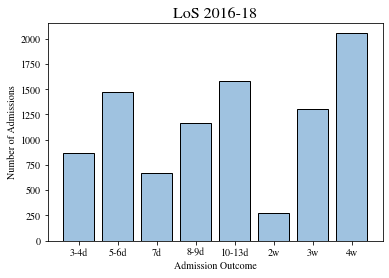

In [39]:
los = list(zip(*d_16_18_los[1]))[1]
los = np.array([dict_LoS[x] for x in los])
los_vals = range(len(dict_LoS.keys()))
los_ = [(i, sum(los == i)) for i in los_vals]

df = pd.DataFrame([list(list(zip(*los_))[1])], columns = [list(list(zip(*los_))[0])], index = ['LoS'])
display(df)
fig, ax = plt.subplots()
ax.bar(list(list(zip(*los_))[0]), list(list(zip(*los_))[1]), edgecolor='black', color='#9fc2e0')
ax.set_xlabel('Admission Outcome')
ax.set_ylabel('Number of Admissions')
plt.xticks(los_vals, list(dict_LoS.keys()))
plt.title('LoS 2016-18', fontsize = 16)
#ax.grid(axis='')
plt.show()

0     1    2     3     4    5     6     7
LoS  707  1152  598  1043  1429  249  1083  1631

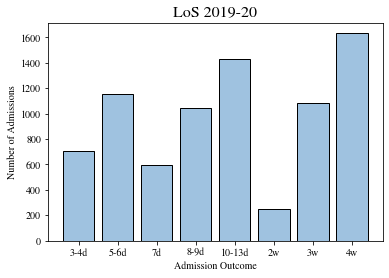

In [40]:
los = list(zip(*d_19_20_los[1]))[1]
los = np.array([dict_LoS[x] for x in los])
los_vals = range(len(dict_LoS.keys()))
los_ = [(i, sum(los == i)) for i in los_vals]

df = pd.DataFrame([list(list(zip(*los_))[1])], columns = [list(list(zip(*los_))[0])], index = ['LoS'])
display(df)
fig, ax = plt.subplots()
ax.bar(list(list(zip(*los_))[0]), list(list(zip(*los_))[1]), edgecolor='black', color='#9fc2e0')
ax.set_xlabel('Admission Outcome')
ax.set_ylabel('Number of Admissions')
plt.xticks(los_vals, list(dict_LoS.keys()))
plt.title('LoS 2019-20', fontsize = 16)
#ax.grid(axis='')
plt.show()

In [41]:
set(los)&set(los)

{0, 1, 2, 3, 4, 5, 6, 7}

In [42]:
d_16_18_mrt[d_16_18_mrt['admission_id']==56668].head(3)#.unique()

admission_id         rr  ews heart_rate temperature    sbp        dbp  \
648864        56668  24.000000  5.0       79.0        37.1  161.0       90.0   
648865        56668  23.500000  6.0       72.5       37.05  153.5       81.0   
648866        56668  20.833334  5.0  69.333333        37.0  145.0  76.666667   

       Oxygen_Saturation Assisted_O2  Confusion  ...   ALB    ALP  BILI  \
648864              95.0         1.0        0.0  ...  42.0  101.0  38.0   
648865              90.0         1.0        1.0  ...  42.0  101.0  38.0   
648866              90.0         1.0        0.0  ...  42.0  101.0  38.0   

       no_sample_series  sex ethnicity age_at_admin Comorb_score Spcfc_Comorb  \
648864                0  1.0      10.0         82.0          1.0          1.0   
648865                1  1.0      10.0         82.0          1.0          1.0   
648866                2  1.0      10.0         82.0          1.0          1.0   

       Mortality  
648864       0.0  
648865       0.0  
648866       0.0  

[3 rows x 36 columns]

In [43]:
d_16_18_ews[0][d_16_18_ews[0]['admission_id']==56668].head(3)

admission_id         rr  ews  heart_rate  temperature    sbp  \
648864        56668  24.000000  5.0   79.000000        37.10  161.0   
648865        56668  23.500000  6.0   72.500000        37.05  153.5   
648866        56668  20.833334  5.0   69.333333        37.00  145.0   

              dbp  Oxygen_Saturation  Assisted_O2  Confusion  ...   ALB  \
648864  90.000000               95.0          1.0        0.0  ...  42.0   
648865  81.000000               90.0          1.0        1.0  ...  42.0   
648866  76.666667               90.0          1.0        0.0  ...  42.0   

          ALP  BILI  no_sample_series  sex  ethnicity  age_at_admin  \
648864  101.0  38.0               0.0  1.0       10.0          82.0   
648865  101.0  38.0               1.0  1.0       10.0          82.0   
648866  101.0  38.0               2.0  1.0       10.0          82.0   

        Comorb_score  Spcfc_Comorb  Mortality  
648864           1.0           1.0        0.0  
648865           1.0           1.0        0.0  
648866           1.0           1.0        0.0  

[3 rows x 36 columns]

In [44]:
d_16_18_los[0][d_16_18_los[0]['admission_id']==56668].head(3)

admission_id         rr  ews  heart_rate  temperature    sbp  \
648864        56668  24.000000  5.0   79.000000        37.10  161.0   
648865        56668  23.500000  6.0   72.500000        37.05  153.5   
648866        56668  20.833334  5.0   69.333333        37.00  145.0   

              dbp  Oxygen_Saturation  Assisted_O2  Confusion  ...   ALB  \
648864  90.000000               95.0          1.0        0.0  ...  42.0   
648865  81.000000               90.0          1.0        1.0  ...  42.0   
648866  76.666667               90.0          1.0        0.0  ...  42.0   

          ALP  BILI  no_sample_series  sex  ethnicity  age_at_admin  \
648864  101.0  38.0               0.0  1.0       10.0          82.0   
648865  101.0  38.0               1.0  1.0       10.0          82.0   
648866  101.0  38.0               2.0  1.0       10.0          82.0   

        Comorb_score  Spcfc_Comorb  Mortality  
648864           2.0           1.0        0.0  
648865           2.0           1.0        0.0  
648866           2.0           1.0        0.0  

[3 rows x 36 columns]

# Variables Continuous

In [45]:
d_16_18_mrt['Comorb_score'] = d_16_18_mrt['admission_id'].apply(lambda x: charlson_dict_16_18[x])
d_19_20_mrt['Comorb_score'] = d_19_20_mrt['admission_id'].apply(lambda x: charlson_dict_19_20[x])


df_data_train = d_16_18_mrt[d_16_18_mrt['no_sample_series'] == 0].copy()
df_data_valid = d_19_20_mrt[d_19_20_mrt['no_sample_series'] == 0].copy()


dict_labels = {'rr':'Respiratory rate','ews':'EWS','heart_rate':'Heart rate','temperature':'Temperature',
               'sbp':'Systolic bp','dbp':'Diastolic bp','Oxygen_Saturation':'Oxygen Saturation','Assisted_O2':'Assisted O2',
               'Confusion':'Confusion','CREA':'Creatinine','UREA':'Urea','K':'Potassium', 'GFR':'GFR','WBC':'WBC',
               'PLT':'Platelets','HCT':'HCT','HGB':'Haemoglobin','RBC':'RBC','MCH':'MCH','MCV':'MCV','NEUAB':'Neutrophil Ab',
               'TLYMAB':'T-lymphocite Ab','EOSAB':'EOS Ab','MONAB':'Monocyte Ab','BASAB':'Anti Basophil Ab','ALB':'Albumin',
               'ALP':'Alk. Phosph.','BILI':'Bilirubin','sex':'Sex','ethnicity':'Ethnicity','had_Prev_admin':'Prev. admission',
               'age_at_admin':'Age at admission','Comorb_score':'Charlson comorbid.','Spcfc_Comorb':'Resp. Comorbidity'}

dict_units = {'rr':'Resp. rate [1/min]','heart_rate':'Heart rate [1/min]','temperature':'Temperature [°C]',
               'sbp':'Systolic bp [mmHg]','dbp':'Diastolic bp [mmHg]','Oxygen_Saturation':'Oxygen Saturation [%]',
              'CREA':'Creatinine [umol/L]','UREA':'Urea [umol/L]','K':'K [umol/L]', 
              'GFR':'GFR [mL/min]', 'WBC':'WBC [x10^9/L]','PLT':'Platelets [x10^9/L]','HCT':'HCT [L/L]',
              'HGB':'Haemoglobin [g/L]','RBC':'RBC [x10^12/L]','MCH':'MCH [pg]','MCV':'MCV [fl]','NEUAB':'Neut. [x10^9/L]','TLYMAB':'T-lymph. [x10^9/L]',
              'EOSAB':'EOS. [x10^9/L]','MONAB':'Monocyte [x10^9/L]','BASAB':'Basophil [x10^9/L]','ALB':'Albumin [g/L]',
               'ALP':'Alk. Phosph. [iu/L]','BILI':'Bilirubin [umol/L]',}

In [46]:
df_data_valid[df_data_valid['Mortality'] == 0]

admission_id    rr  ews heart_rate temperature    sbp    dbp  \
0           70461223  17.0  2.0      102.0        36.5  148.0   80.0   
144         19488170  22.0  7.0       95.0        39.8  113.0   68.0   
576         47048263  18.0  3.0       86.0        38.1  149.0   84.0   
720         68724460  20.0  2.0       60.0        36.7   97.0   67.0   
864         97758575  22.0  6.0       94.0        39.0  138.0   74.0   
...              ...   ...  ...        ...         ...    ...    ...   
1135728     68154417  28.0  6.0      100.0        36.9  127.0  100.0   
1135872     35752982  26.0  3.0       86.0        36.8  129.0   75.0   
1136016     54684172  20.0  4.0       68.0        37.2  110.0   95.0   
1136160     46049694  17.0  4.0       49.0        30.0  121.0   77.0   
1136304     45308426  18.0  3.0       93.0        38.5  122.0   66.0   

        Oxygen_Saturation Assisted_O2  Confusion  ...        ALB        ALP  \
0                    95.0         0.0        0.0  ...       34.0       69.0   
144                  96.0         1.0        0.0  ...       40.0      152.0   
576                  99.0         1.0        0.0  ...       42.0       58.0   
720                  97.0         0.0        0.0  ...  38.818182  62.909091   
864                  99.0         1.0        0.0  ...     43.625       64.5   
...                   ...         ...        ...  ...        ...        ...   
1135728              96.0         1.0        0.0  ...       42.0       61.0   
1135872              96.0         0.0        0.0  ...       42.0       89.4   
1136016              95.0         1.0        0.0  ...       45.0       37.0   
1136160             100.0         0.0        0.0  ...       35.5      200.0   
1136304              95.0         0.0        0.0  ...       33.0       90.0   

             BILI no_sample_series  sex ethnicity age_at_admin Comorb_score  \
0             8.0                0  1.0       0.0         69.0            0   
144          13.0                0 -1.0       0.0         77.0            2   
576           8.0                0 -1.0       0.0         75.0            2   
720      7.818182                0 -1.0       8.0         61.0            3   
864        25.375                0 -1.0       1.0         57.0            0   
...           ...              ...  ...       ...          ...          ...   
1135728      10.0                0 -1.0       0.0         77.0            2   
1135872      36.8                0 -1.0       0.0         81.0            3   
1136016      11.0                0 -1.0       0.0         67.0            0   
1136160      10.5                0 -1.0       0.0         40.0            1   
1136304      18.0                0  1.0       1.0         73.0            1   

        Spcfc_Comorb Mortality  
0                1.0       0.0  
144              1.0       0.0  
576              0.0       0.0  
720              1.0       0.0  
864              0.0       0.0  
...              ...       ...  
1135728          0.0       0.0  
1135872          1.0       0.0  
1136016          0.0       0.0  
1136160          1.0       0.0  
1136304          0.0       0.0  

[5948 rows x 36 columns]

In [47]:
len(dict_units.values())

25

In [48]:
import matplotlib.ticker as ticker
#'sex':'Sex','ethnicity':'Ethnicity','had_Prev_admin':'Prev. admission','age_at_admin':'Age at admission','ews':'EWS',
#'Assisted_O2':'Assisted O2', 'Spcfc_Comorb':'Resp. Comorbidity','Confusion':'Confusion', 'Comorb_score':'Charlson comorbid.'

def Boxplot_feats(lst_feat, nrows, ncols, name):
    df_disch_train = df_data_train[df_data_train['Mortality'] == 0]; df_decea_train = df_data_train[df_data_train['Mortality'] == 1]
    df_disch_valid = df_data_valid[df_data_valid['Mortality'] == 0]; df_decea_valid = df_data_valid[df_data_valid['Mortality'] == 1]
    
    fig, axs = plt.subplots(nrows, ncols, figsize = (30,10*nrows))
    for idx, feat in enumerate(lst_feat):
        feat_disch_train = np.array(df_disch_train[feat].tolist())
        feat_decea_train = np.array(df_decea_train[feat].tolist())
        feat_disch_valid = np.array(df_disch_valid[feat].tolist())
        feat_decea_valid = np.array(df_decea_valid[feat].tolist())

        data = [feat_disch_train, feat_decea_train, feat_disch_valid, feat_decea_valid]
        i = int(idx/ncols);  j = idx%ncols

        axs[i,j].boxplot(data)
        axs[i,j].scatter([1,2,3,4],[feat_disch_train.mean(), feat_decea_train.mean(), feat_disch_valid.mean(), feat_decea_valid.mean()])
        
        xticks = [1,1.5,2,3,3.5, 4]; xlbls = ['Discharge', '\n Train', 'Deceased','Discharge', '\n Valid', 'Deceased']

        axs[i,j].set_xticks(xticks, xlbls)
        axs[i,j].set_title(dict_labels[feat], fontsize = 30)
        axs[i,j].set_ylabel(dict_units[feat], fontsize = 25)
        axs[i,j].tick_params(axis='both', labelsize=25)
        
    if len(lst_feat) < (nrows*ncols):
        for idx in  range(len(lst_feat),(nrows*ncols)):
            i = int(idx/ncols);  j = idx%ncols
            fig.delaxes(axs[i,j])
        
    plt.savefig(name + '.png', transparent = True, bbox_inches = "tight")
    plt.show()

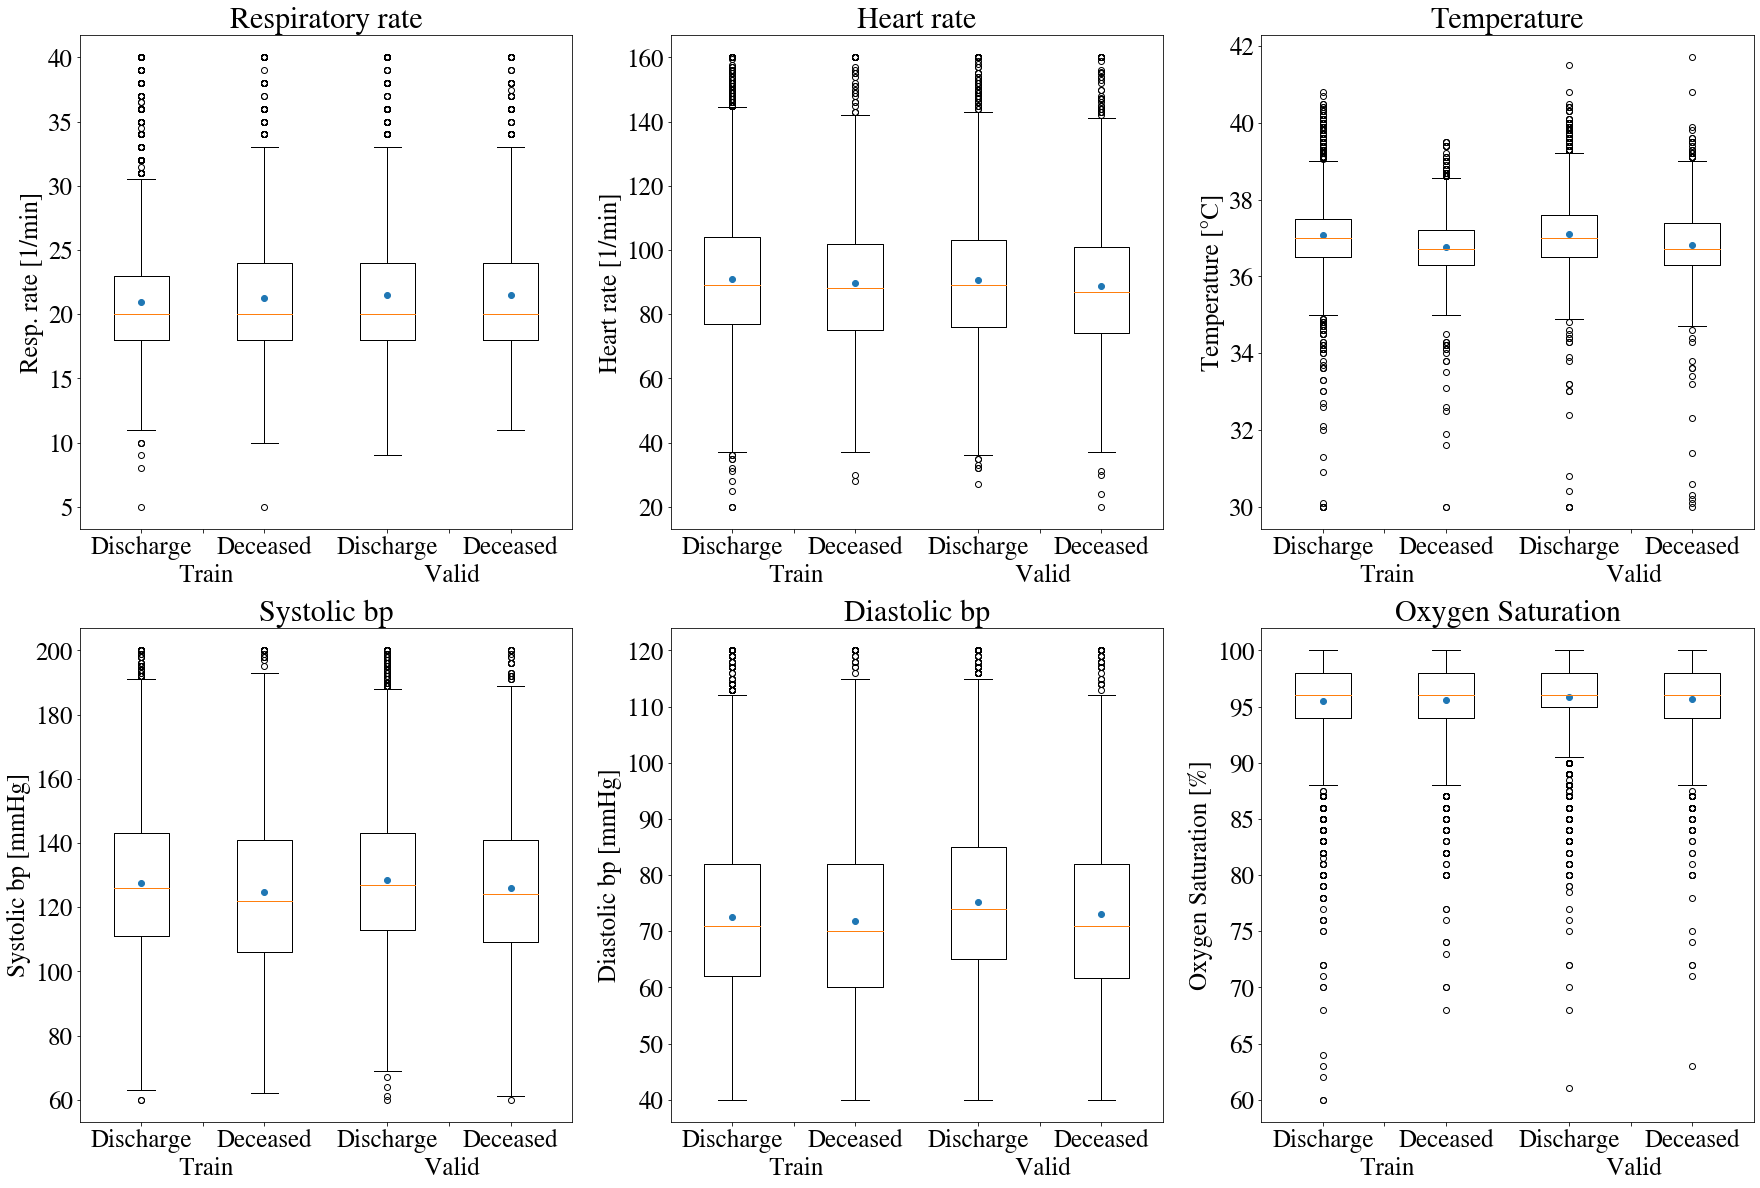

In [49]:
features = ['rr','heart_rate','temperature','sbp','dbp','Oxygen_Saturation']
Boxplot_feats(features, 2, 3, 'Boxplot_Cont_variable1.png')

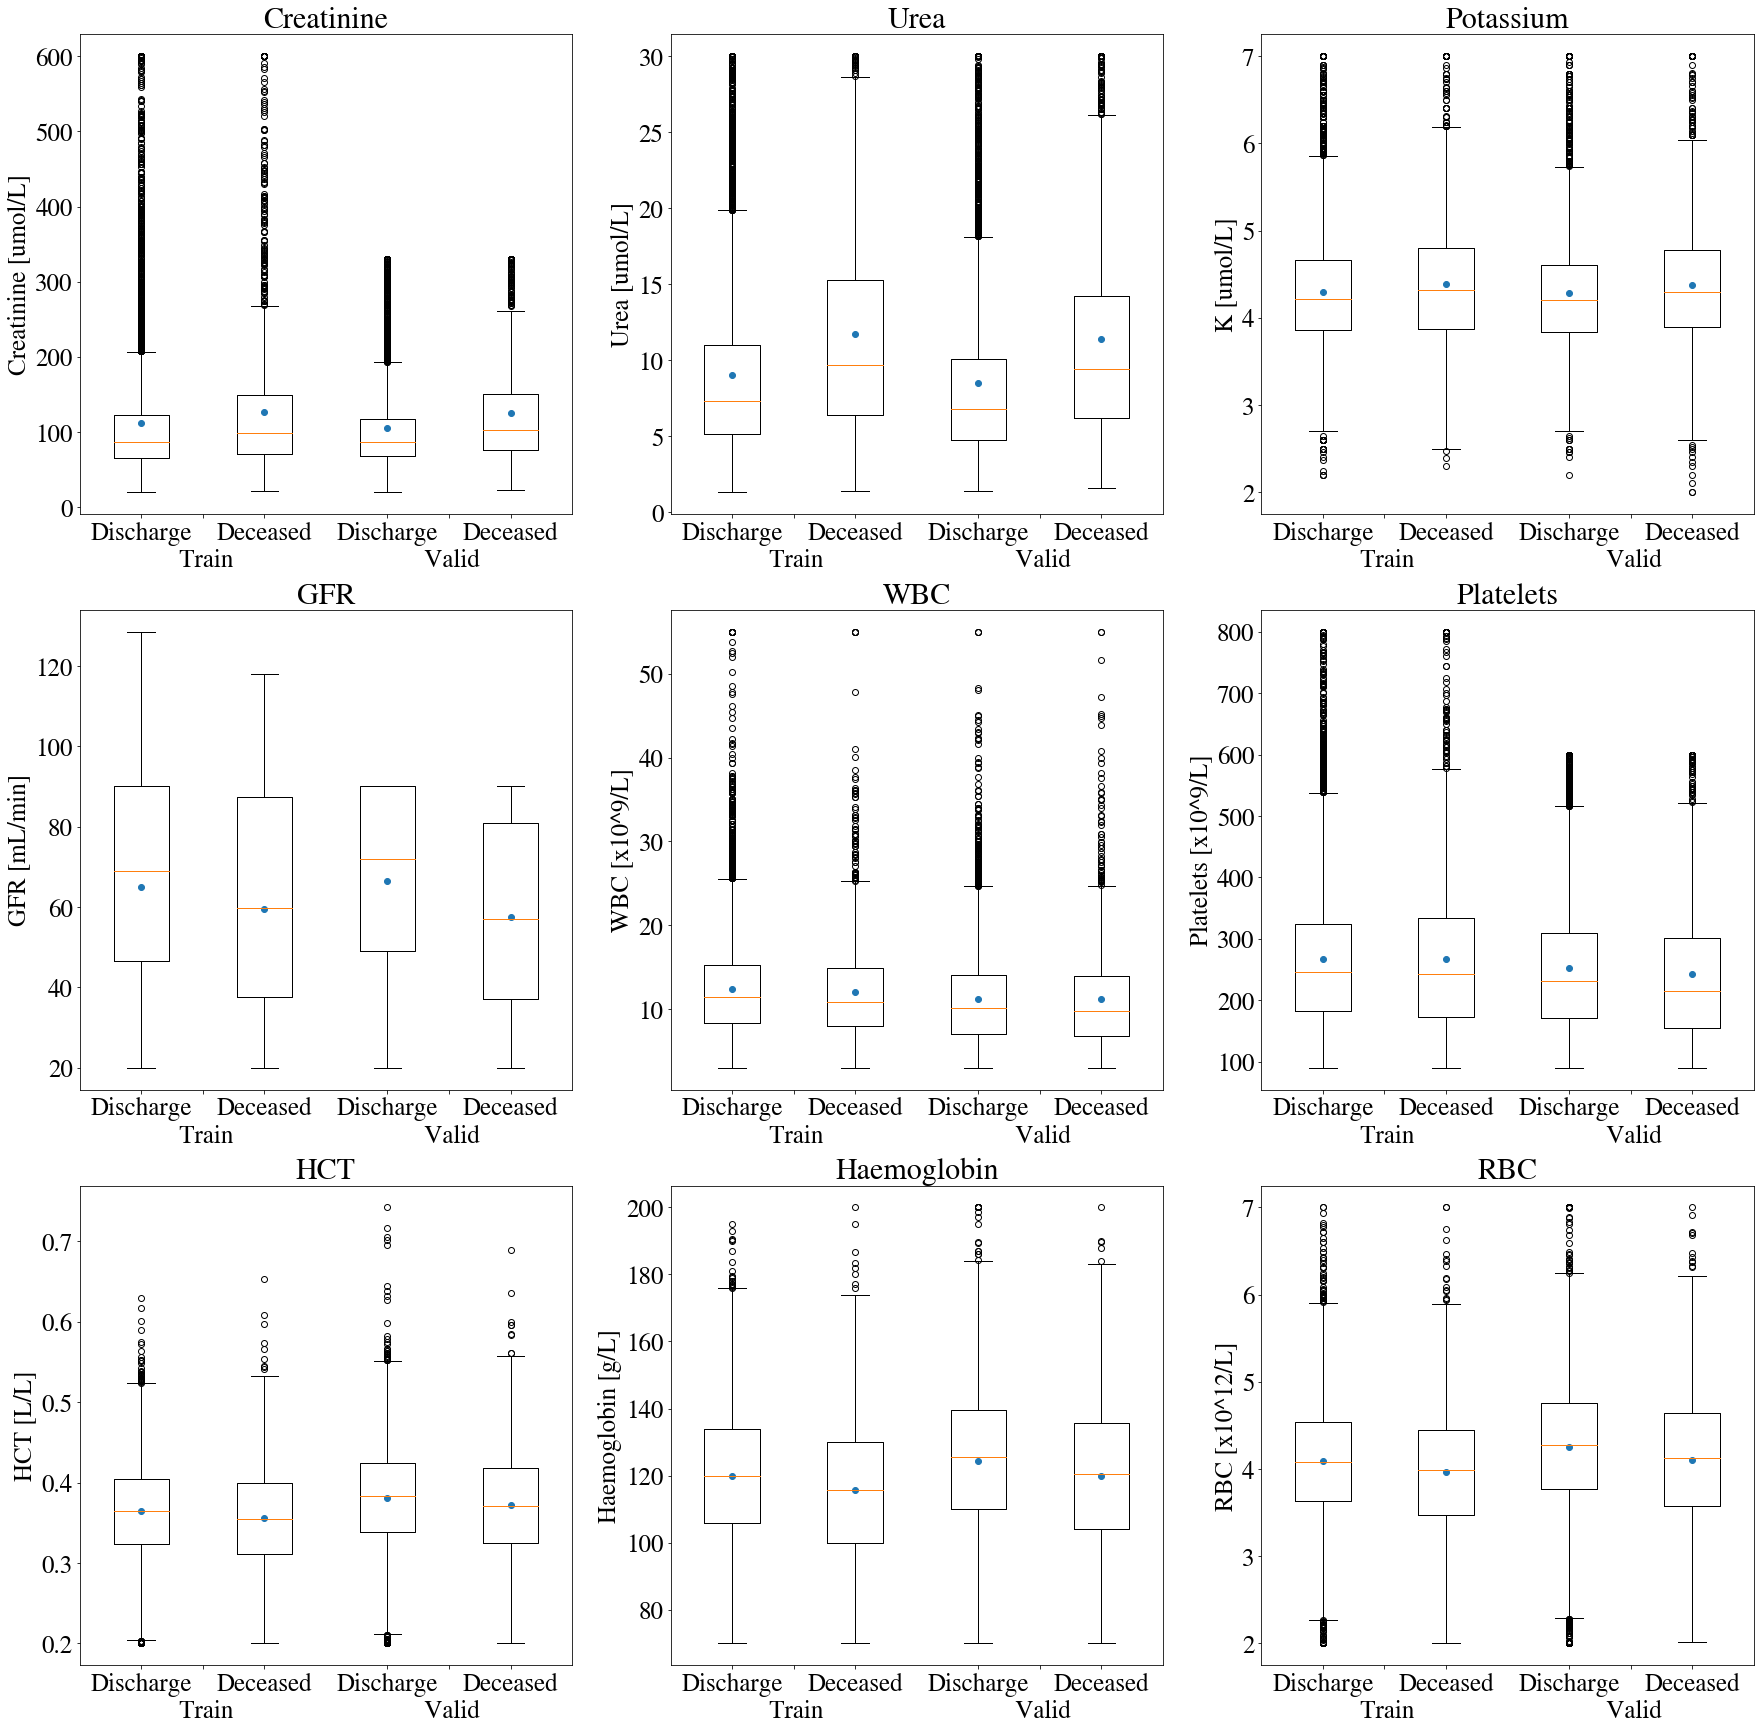

In [50]:
features = ['CREA','UREA','K','GFR', 'WBC','PLT','HCT','HGB','RBC']
Boxplot_feats(features, 3, 3, 'Boxplot_Cont_variable2.png')

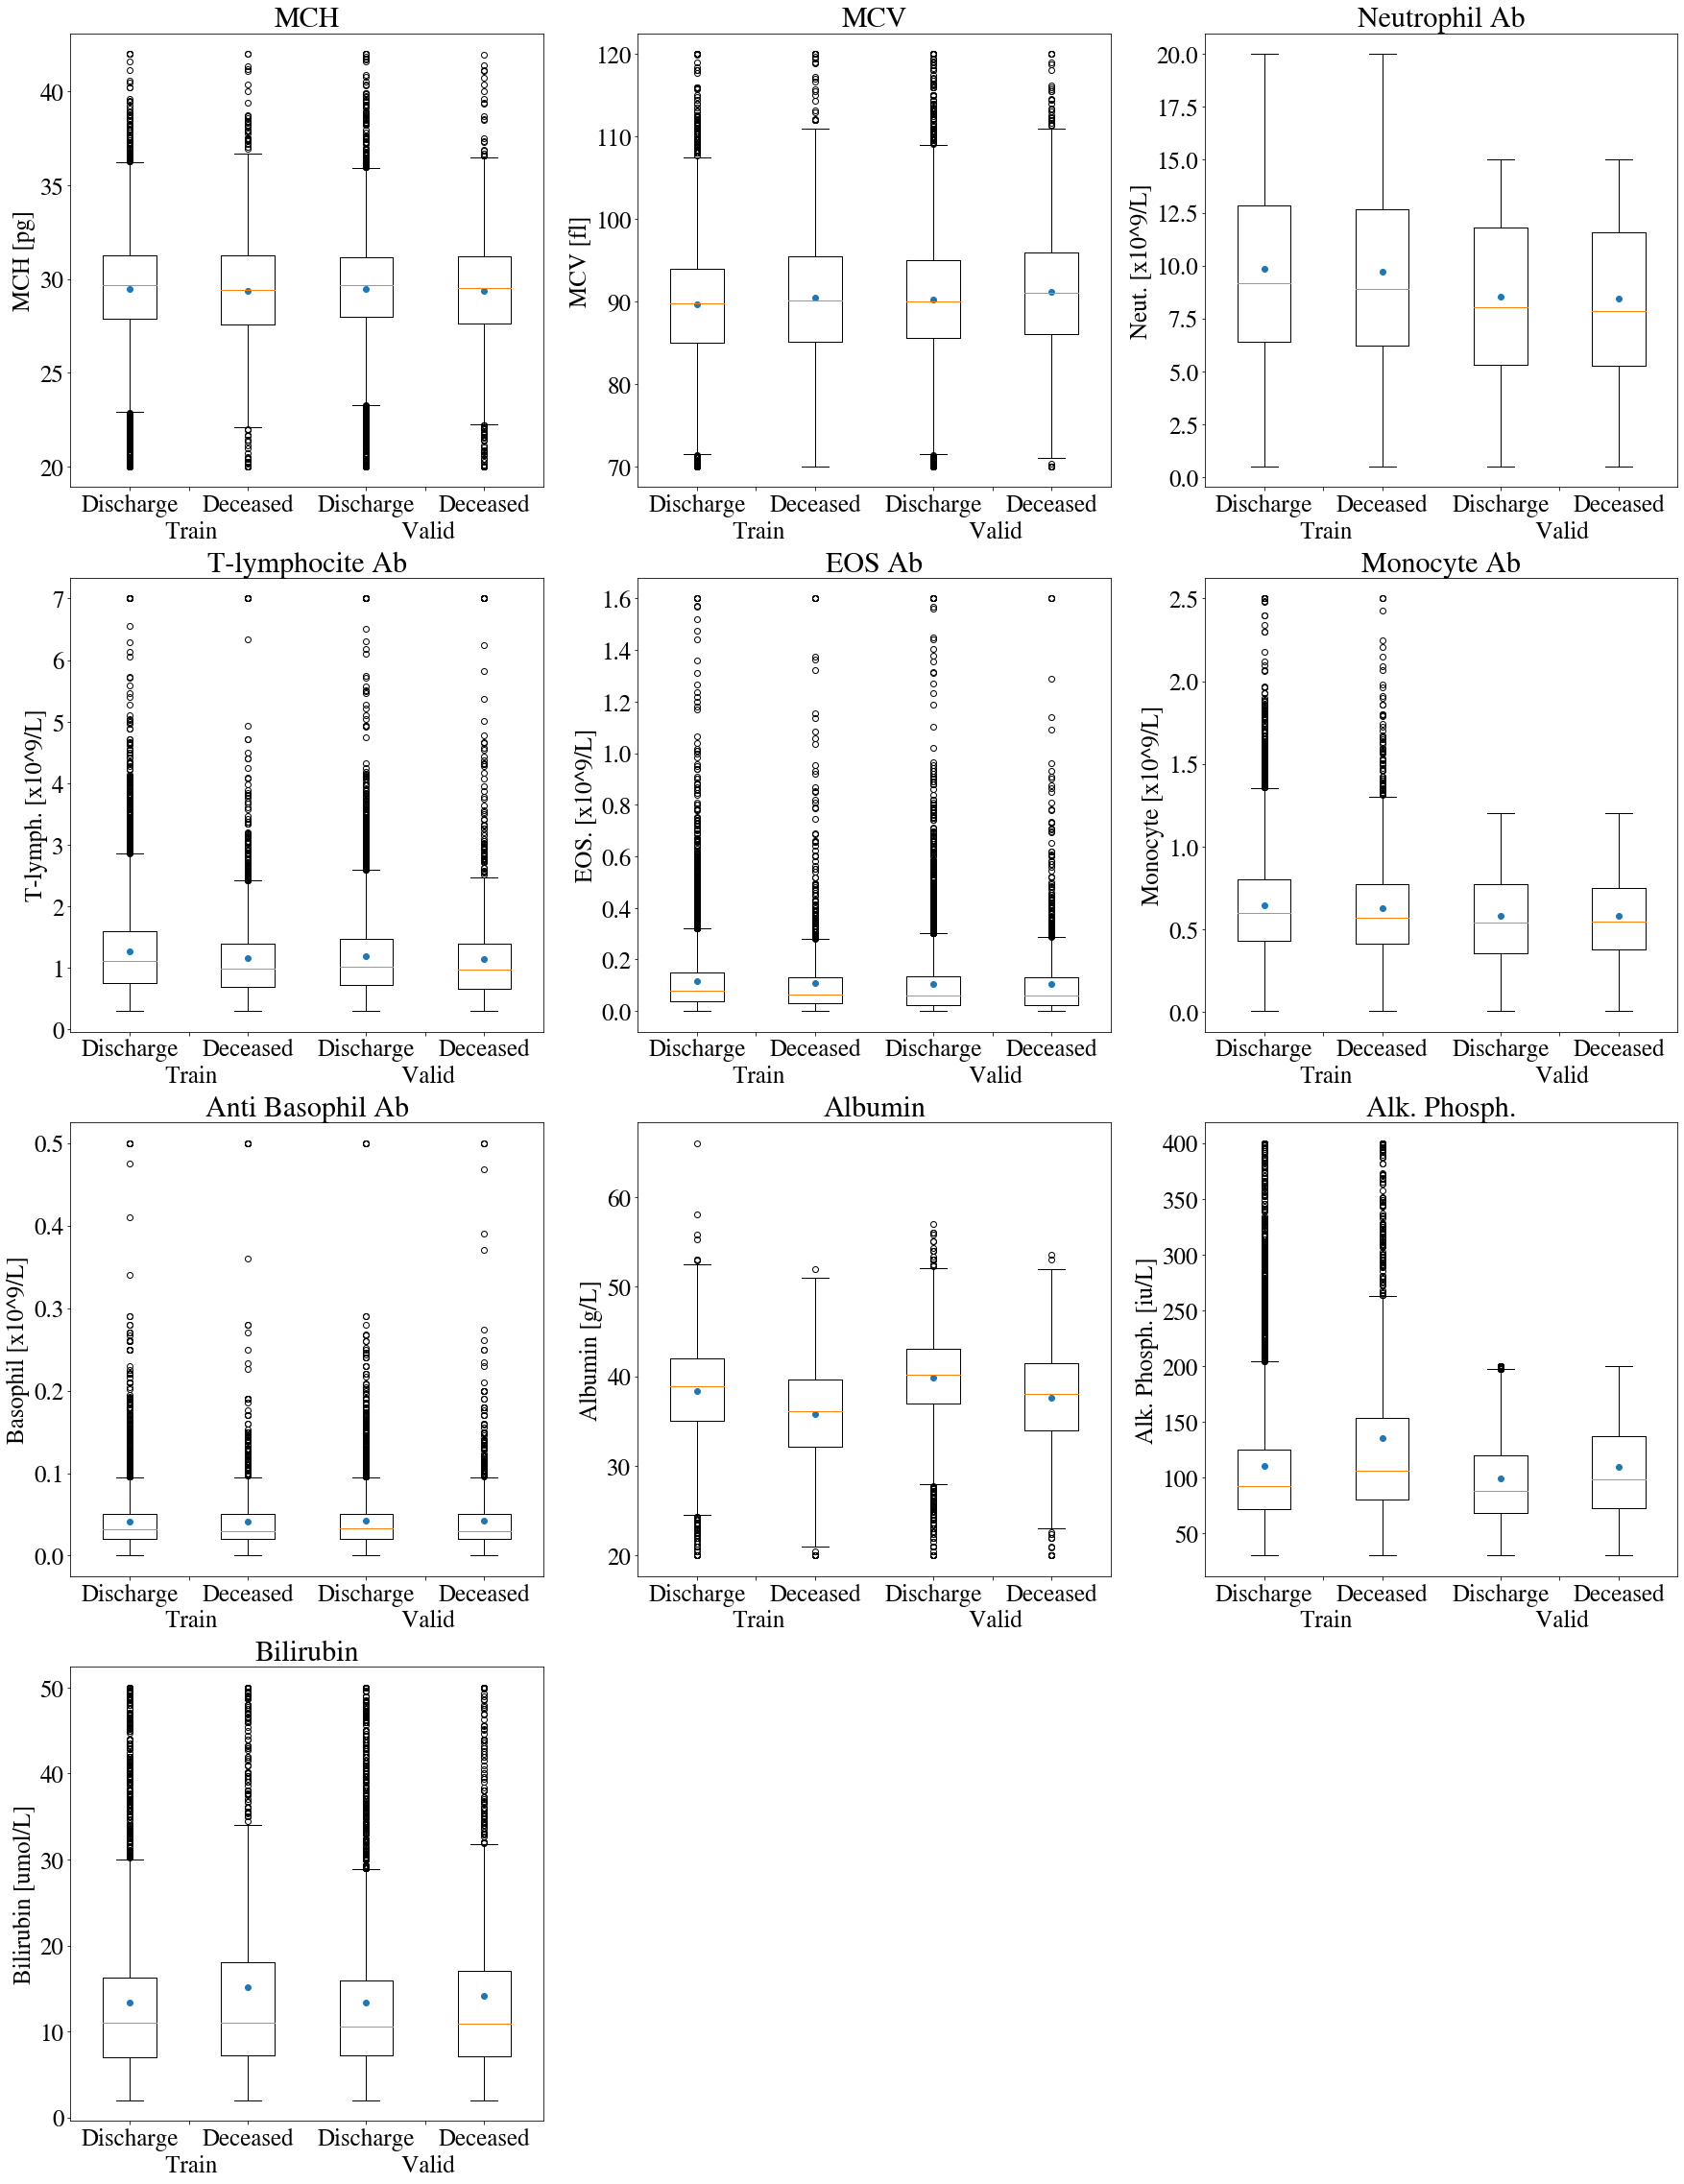

In [51]:
features =  ['MCH','MCV','NEUAB','TLYMAB','EOSAB','MONAB','BASAB','ALB','ALP','BILI']
Boxplot_feats(features, 4, 3, 'Boxplot_Cont_variable3.png')

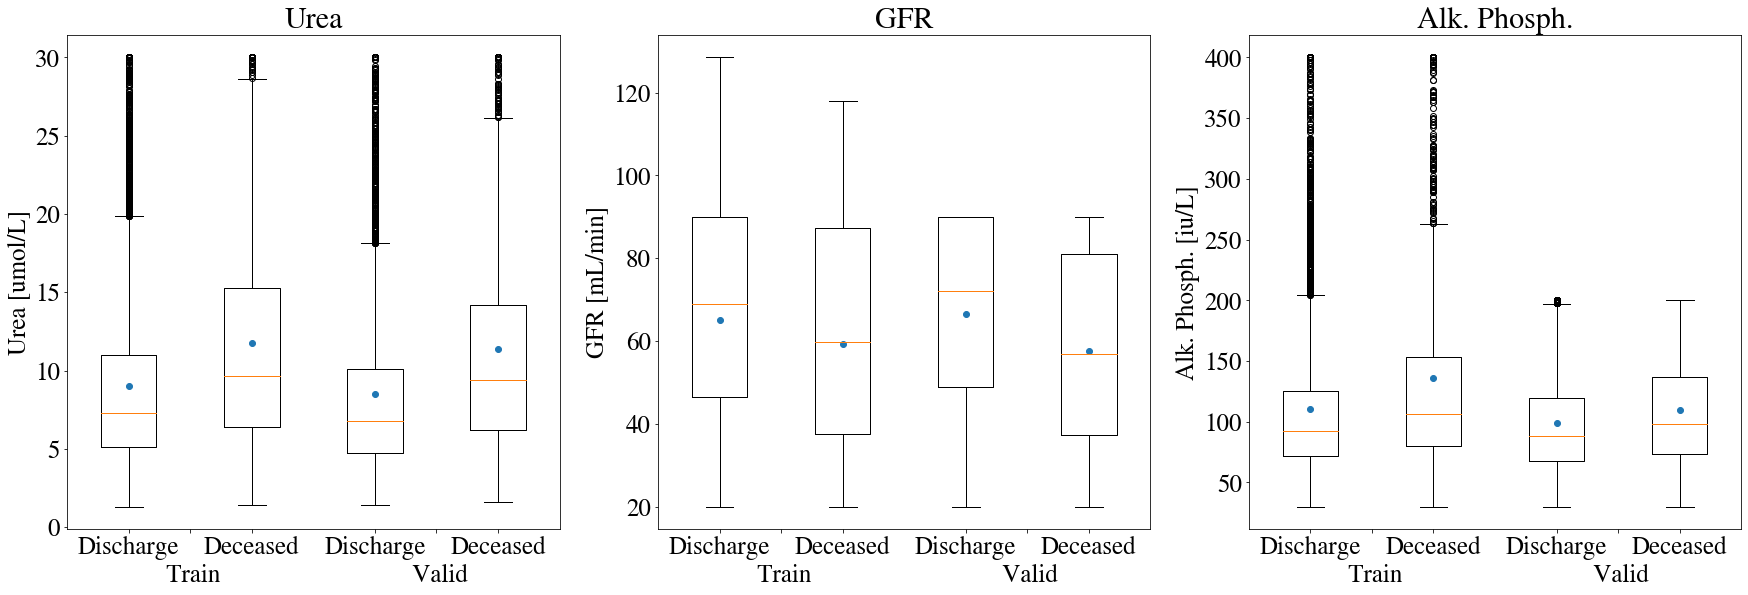

In [52]:
features =  ['UREA','GFR','ALP']
Boxplot_feats(features, 2, 3, 'Boxplot_Cont_variable4.png')

# Binary Variables

In [53]:

dict_labels = {'rr':'Respiratory rate','ews':'EWS','heart_rate':'Heart rate','temperature':'Temperature',
               'sbp':'Systolic bp','dbp':'Diastolic bp','Oxygen_Saturation':'Oxygen Saturation','Assisted_O2':'Assisted O2',
               'Confusion':'Confusion','CREA':'Creatinine','UREA':'Urea','K':'Potassium', 'GFR':'GFR','WBC':'WBC',
               'PLT':'Platelets','HCT':'HCT','HGB':'Haemoglobin','RBC':'RBC','MCH':'MCH','MCV':'MCV','NEUAB':'Neutrophil Ab',
               'TLYMAB':'T-lymphocite Ab','EOSAB':'EOS Ab','MONAB':'Monocyte Ab','BASAB':'Anti Basophil Ab','ALB':'Albumin',
               'ALP':'Alk. Phosph.','BILI':'Bilirubin','sex':'Sex','ethnicity':'Ethnicity','had_Prev_admin':'Prev. admission',
               'age_at_admin':'Age at admission','Comorb_score':'Charlson comorbid.','Spcfc_Comorb':'Resp. Comorbidity'}


dict_xlabels = {'Assisted_O2':{1: 'Yes', 0 : 'No'},
               'Confusion':{1: 'Yes', 0 : 'No'},
                'sex':{-1: 'Male', 1 : 'Female'},
                #'ethnicity':'Ethnicity',
                #'had_Prev_admin':{1: 'Yes', 0 : 'No'},
                'Spcfc_Comorb':{1: 'Yes', 0 : 'No'}}


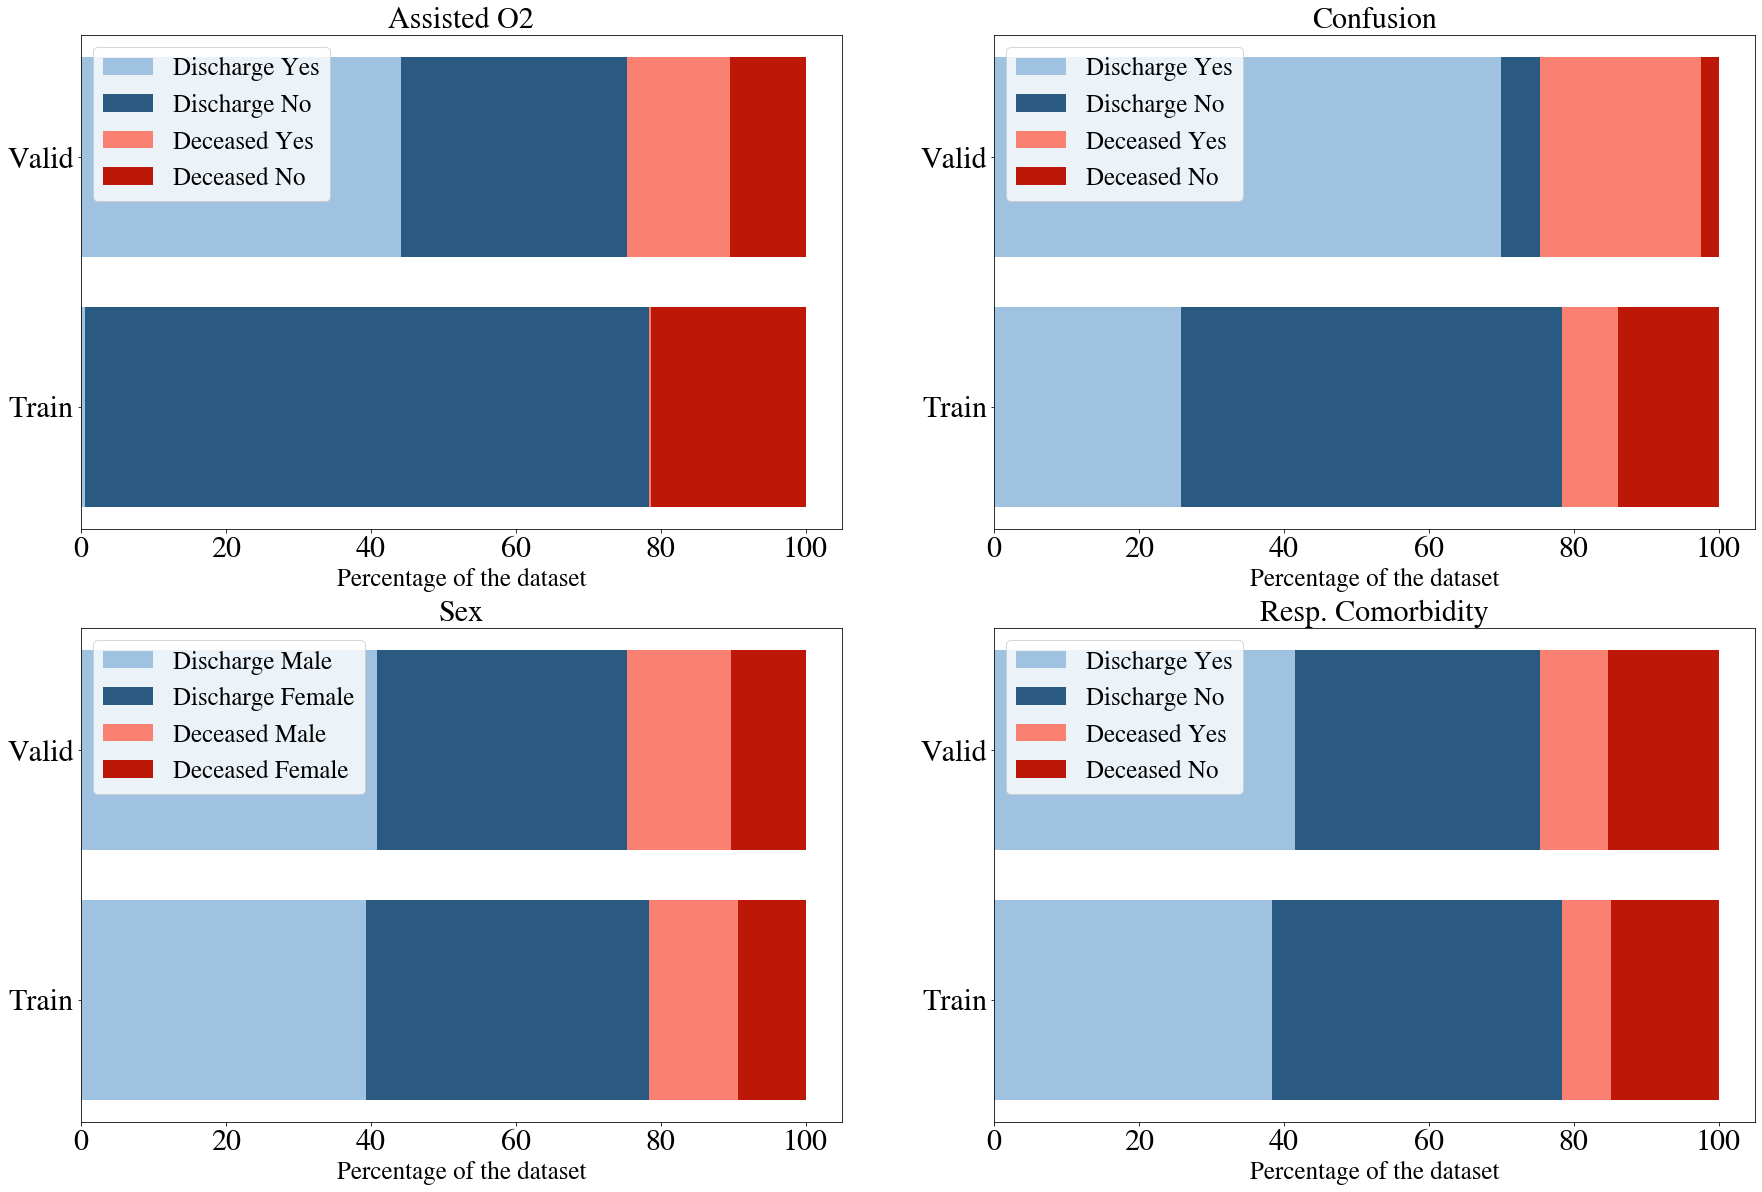

In [54]:
colors = ['#9fc2e0','#2A5A82', '#FA8072', '#BD1807']
lbl_comp = ['Discharge', 'Deceased']

nrows =2
ncols = 2
fig, ax = plt.subplots(nrows, ncols, figsize = (30,10*nrows))

for idf, feat in enumerate(dict_xlabels.keys()):
    train = np.array(df_data_train.groupby(by = [ 'Mortality', feat]).count()['admission_id'].tolist()) *100/len(df_data_train)
    valid = np.array(df_data_valid.groupby(by = [ 'Mortality', feat]).count()['admission_id'].tolist()) *100/len(df_data_valid)

    i = int(idf/ncols);  j = idf%ncols
    label_ = list(dict_xlabels[feat].values())[0]
    ax[i,j].barh([0,1], [train[0], [valid[0]]],  color = colors[0],
               label = lbl_comp[0] + " "+ label_)
    for idx in range(1, len(train)):   
        comp = lbl_comp[0] if idx < 2 else lbl_comp[1]
        label_ = comp + " "+ list(dict_xlabels[feat].values())[idx%2]
        ax[i,j].barh([0,1], [train[idx], valid[idx]], left = [train[:idx].sum(), valid[:idx].sum()], color = colors[idx],
               label = label_)
        ax[i,j].set_yticks([0,1], ['Train', 'Valid'])
        ax[i,j].set_title(dict_labels[feat], fontsize = 30)
        ax[i,j].tick_params(axis='both', labelsize=30)
        ax[i,j].set_xlabel('Percentage of the dataset', fontsize = 25)
        ax[i,j].legend(fontsize = 25)
plt.savefig('BoB_Binary_variables.png', transparent = True, bbox_inches = "tight")
plt.show()

In [55]:
display(df_data_train.groupby(by=['ethnicity']).count())


eth_codes = {'White-British':[0],'Indian':[3],'Asian': [4, 13,10,2],'Others': [1,9,8],
             'Black' : [12,14,11,15,16,5],'White-Other': [6,7]}
eth_codes = {'White-British':[0],'Asian': [3,4, 13,10,2],
             'Others': [1,9,8,12,14,11,15,16,5,6,7]}

dict_eth_plot = {}
for eth in eth_codes.keys():
    dict_eth_plot[eth] = len(df_data_train[df_data_train['ethnicity'].isin(eth_codes[eth])])
dict_eth_plot = {k: v for k, v in sorted( dict_eth_plot.items(), key=lambda item: item[1], reverse =True)}
dict_eth_plot    


admission_id    rr   ews  heart_rate  temperature   sbp   dbp  \
ethnicity                                                                  
0.0                7524  7524  7524        7524         7524  7524  7524   
1.0                 113   113   113         113          113   113   113   
2.0                  29    29    29          29           29    29    29   
3.0                 943   943   943         943          943   943   943   
4.0                  16    16    16          16           16    16    16   
5.0                   2     2     2           2            2     2     2   
6.0                 118   118   118         118          118   118   118   
7.0                 277   277   277         277          277   277   277   
8.0                 139   139   139         139          139   139   139   
9.0                  47    47    47          47           47    47    47   
10.0                 53    53    53          53           53    53    53   
11.0                 22    22    22          22           22    22    22   
12.0                 49    49    49          49           49    49    49   
13.0                  6     6     6           6            6     6     6   
14.0                 33    33    33          33           33    33    33   
15.0                 14    14    14          14           14    14    14   
16.0                  5     5     5           5            5     5     5   

           Oxygen_Saturation  Assisted_O2  Confusion  ...  BASAB   ALB   ALP  \
ethnicity                                             ...                      
0.0                     7524         7524       7524  ...   7524  7524  7524   
1.0                      113          113        113  ...    113   113   113   
2.0                       29           29         29  ...     29    29    29   
3.0                      943          943        943  ...    943   943   943   
4.0                       16           16         16  ...     16    16    16   
5.0                        2            2          2  ...      2     2     2   
6.0                      118          118        118  ...    118   118   118   
7.0                      277          277        277  ...    277   277   277   
8.0                      139          139        139  ...    139   139   139   
9.0                       47           47         47  ...     47    47    47   
10.0                      53           53         53  ...     53    53    53   
11.0                      22           22         22  ...     22    22    22   
12.0                      49           49         49  ...     49    49    49   
13.0                       6            6          6  ...      6     6     6   
14.0                      33           33         33  ...     33    33    33   
15.0                      14           14         14  ...     14    14    14   
16.0                       5            5          5  ...      5     5     5   

           BILI  no_sample_series   sex  age_at_admin  Comorb_score  \
ethnicity                                                             
0.0        7524              7524  7524          7524          7524   
1.0         113               113   113           113           113   
2.0          29                29    29            29            29   
3.0         943               943   943           943           943   
4.0          16                16    16            16            16   
5.0           2                 2     2             2             2   
6.0         118               118   118           118           118   
7.0         277               277   277           277           277   
8.0         139               139   139           139           139   
9.0          47                47    47            47            47   
10.0         53                53    53            53            53   
11.0         22                22    22            22            22   
12.0         49                49    49            

{'White-British': 7524, 'Asian': 1047, 'Others': 819}

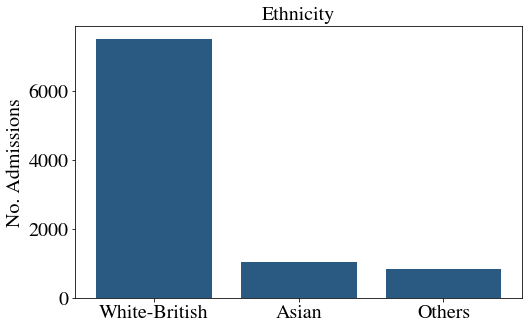

In [56]:
D = dict_eth_plot 
plt.subplots(figsize = (8,5))
plt.bar(range(len(D)), list(D.values()), align='center', color = '#2A5A82')
plt.xticks(range(len(D)), list(D.keys()), fontsize = 20)
plt.tick_params(axis='both', labelsize=20)
plt.ylabel('No. Admissions', fontsize = 20)
plt.title('Ethnicity', fontsize = 20)
plt.savefig('BoB_ethnicity.png', transparent = True, bbox_inches = "tight")
plt.show()

In [57]:
feature_dict = {'rr':'Respiratory Rate', 'UREA':'Urea', 'sbp':'Systolic Blood Pressure',
                'dbp': 'Diastolic blood pressure', 'heart_rate': 'Heart Rate', 'temperature':'Temperature',
               'Oxygen_Saturation':'Oxygen Saturation'}

dict_labels = {'rr':'Respiratory rate','ews':'EWS','heart_rate':'Heart rate','temperature':'Temperature',
               'sbp':'Systolic bp','dbp':'Diastolic bp','Oxygen_Saturation':'Oxygen Saturation','Assisted_O2':'Assisted O2',
               'Confusion':'Confusion','CREA':'Creatinine','UREA':'Urea','K':'Potassium', 'GFR':'GFR','WBC':'WBC',
               'PLT':'Platelets','HCT':'HCT','HGB':'Haemoglobin','RBC':'RBC','MCH':'MCH','MCV':'MCV','NEUAB':'Neutrophil Ab',
               'TLYMAB':'T-lymphocite Ab','EOSAB':'EOS Ab','MONAB':'Monocyte Ab','BASAB':'Anti Basophil Ab','ALB':'Albumin',
               'ALP':'Alk. Phosph.','BILI':'Bilirubin','sex':'Sex','ethnicity':'Ethnicity','had_Prev_admin':'Prev. admission',
               'age_at_admin':'Age at admission','Comorb_score':'Charlson comorbid.','Spcfc_Comorb':'Resp. Comorbidity'}

dict_sypmt_min_max = {'rr':[5, 40], 'heart_rate':[20,160], 'temperature':[30, 45],'sbp': [60,200], 'dbp':[40,120],
                 'Oxygen_Saturation':[60,100], 'ews':[0,21], 'CREA':[20, 600], 'UREA':[0.5, 30],'K':[2,7],'GFR':[20, 200],'WBC':[3, 55],
         'PLT':[90, 800],'HCT':[0.2, 0.75],'HGB':[70,200],'RBC':[2, 7],'MCH':[20, 42],'MCV':[70, 120],
         'NEUAB':[0.5, 20],'TLYMAB':[0.3,7],'EOSAB':[0, 1.6],'MONAB':[0.005,2.5],'BASAB':[0,0.5],'ALB':[20, 70],
         'ALP':[30,400],'BILI':[0, 50]}


feature = 'rr'
df_input_org =  d_16_18_mrt.copy()

t = time.time()
ls_dicts = {}
for mort in df_input_org ['Mortality'].unique():
    df_input = df_input_org[df_input_org ['Mortality']==mort]
    dict_hists = {}
    ls_adms = df_input['admission_id'].unique().tolist()
    for feature in dict_sypmt_min_max.keys():
        #feature = 'heart_rate'
        df = df_input[['admission_id',feature]]
        lims  = dict_sypmt_min_max[feature]
        bins  = [lims[0]+((lims[1]-lims[0])/10*i)for i in range(11)]
        hists = []
        for adm in ls_adms:
            ts_feat = np.array(df[df['admission_id']==adm][feature].tolist())
            hists.append([len(ts_feat[(bins[i]<= ts_feat) & (ts_feat < bins[i +1])]) for i in range(10)])
        dict_hists[feature] = hists
    ls_dicts[mort] = dict_hists
print("Elapsed running the bayesian opt:", time.time()-t)

Elapsed running the bayesian opt: 12653.527388572693


In [58]:
ls_dicts

{1.0: {'rr': [[0, 0, 0, 106, 38, 0, 0, 0, 0, 0],
   [0, 0, 0, 57, 62, 14, 11, 0, 0, 0],
   [0, 0, 0, 121, 23, 0, 0, 0, 0, 0],
   [0, 0, 4, 131, 9, 0, 0, 0, 0, 0],
   [0, 0, 0, 68, 65, 11, 0, 0, 0, 0],
   [0, 0, 0, 87, 57, 0, 0, 0, 0, 0],
   [0, 0, 0, 20, 101, 10, 9, 4, 0, 0],
   [0, 0, 16, 111, 17, 0, 0, 0, 0, 0],
   [0, 0, 0, 88, 56, 0, 0, 0, 0, 0],
   [0, 0, 0, 67, 52, 22, 3, 0, 0, 0],
   [0, 0, 0, 70, 63, 11, 0, 0, 0, 0],
   [0, 0, 1, 130, 13, 0, 0, 0, 0, 0],
   [0, 0, 1, 83, 53, 7, 0, 0, 0, 0],
   [0, 0, 4, 109, 31, 0, 0, 0, 0, 0],
   [0, 0, 42, 56, 46, 0, 0, 0, 0, 0],
   [0, 6, 37, 61, 40, 0, 0, 0, 0, 0],
   [0, 0, 0, 144, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 70, 74, 0, 0, 0, 0, 0],
   [0, 0, 0, 41, 83, 15, 4, 1, 0, 0],
   [0, 0, 0, 74, 62, 8, 0, 0, 0, 0],
   [0, 0, 0, 119, 22, 3, 0, 0, 0, 0],
   [0, 0, 4, 121, 19, 0, 0, 0, 0, 0],
   [0, 0, 0, 9, 95, 20, 17, 3, 0, 0],
   [0, 0, 20, 102, 3, 8, 4, 2, 5, 0],
   [0, 0, 0, 0, 11, 43, 49, 26, 13, 2],
   [0, 0, 0, 97, 45, 2, 0, 0, 0, 0],
   [

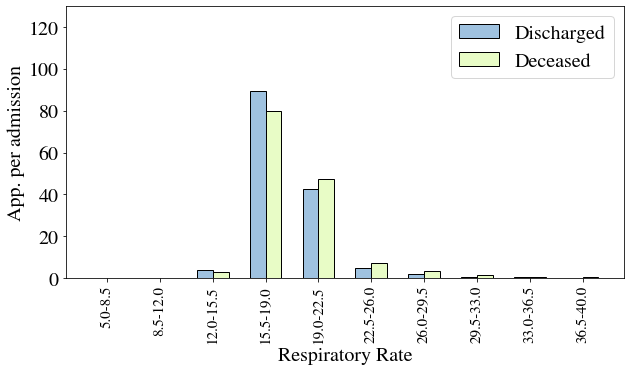

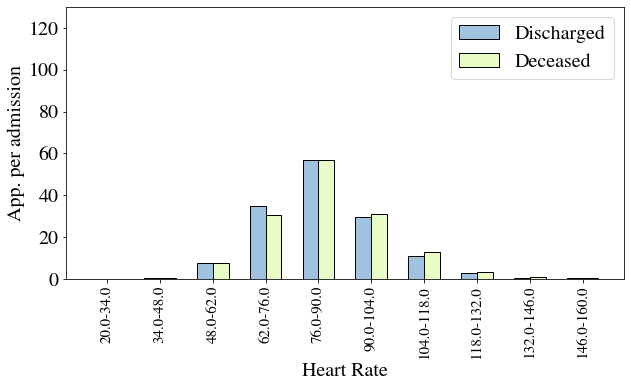

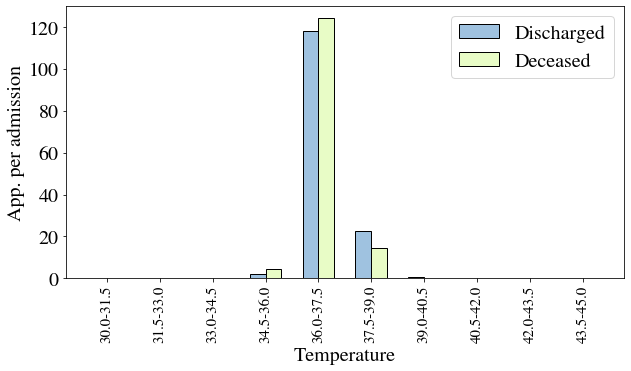

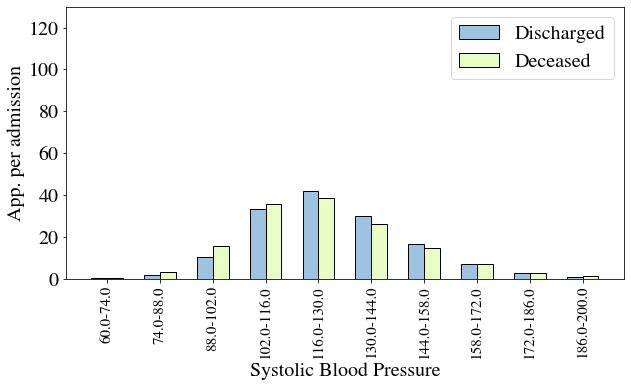

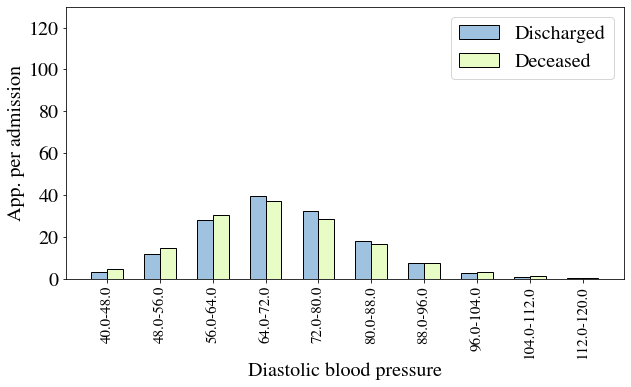

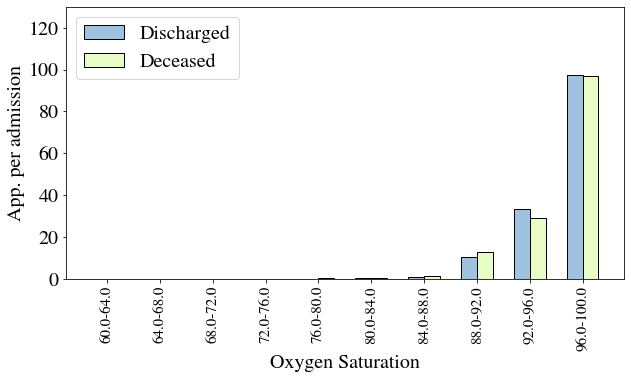

KeyError: 'ews'

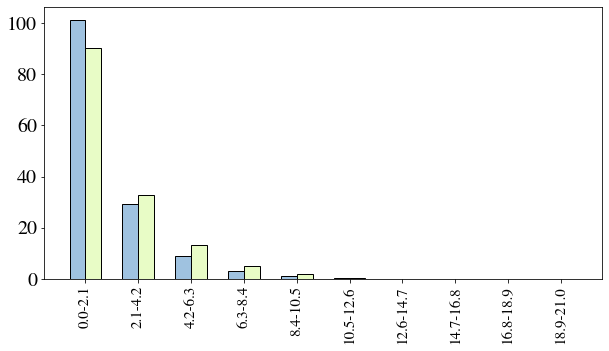

In [59]:
#feat = 'rr'
width = 0.25 
for feat in dict_sypmt_min_max.keys():
    name = 'Description_' + feat
    mort = 0
    lims  = dict_sypmt_min_max[feat]
    bins  = [lims[0]+((lims[1]-lims[0])/10*i)for i in range(11)]
    ticks = ['{:.1f}'.format(bins[i])+'-'+'{:.1f}'.format(bins[i+1]) for i in range(10)]
    aver = np.array(ls_dicts[mort][feat]).mean(axis =0)
    plt.figure(figsize = (10,5))
    plt.bar(np.array(range(len(aver))) - 0.15,aver, edgecolor='black', color='#9fc2e0', label = 'Discharged', width = 0.30)
    mort = 1
    aver = np.array(ls_dicts[mort][feat]).mean(axis =0)
    plt.bar(np.array(range(len(aver))) + 0.15,aver, edgecolor='black', color='#CCFA8072', label= 'Deceased', width = 0.30)
    plt.xticks(range(len(aver)), ticks, rotation=90, fontsize = 15)
    plt.yticks( fontsize = 20)
    plt.xlabel(feature_dict[feat], fontsize = 20)
    plt.ylabel('App. per admission', fontsize = 20)
    plt.ylim([0,130])
    #plt.title('Target variable: Mortality 2019-20', fontsize = 16)
    plt.legend( fontsize = 20)
    plt.savefig(name + '.png', transparent = True, bbox_inches = "tight")
    plt.show()